In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2020.csv')

<ipython-input-90-5d2c84b23d27>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2020.csv')


In [ ]:
df1.head()

,owning_agency_name,reporting_agency_name,submission_period,agency_identifier_name,budget_function,budget_subfunction,federal_account_symbol,federal_account_name,program_activity_code,program_activity_name,...,USSGL498200_upward_adj_of_prior_year_deliv_orders_oblig_paid,deobligations_or_recoveries_or_refunds_from_prior_year,USSGL487100_downward_adj_prior_year_unpaid_undeliv_orders_oblig,USSGL497100_downward_adj_prior_year_unpaid_deliv_orders_oblig,USSGL487200_downward_adj_prior_year_prepaid_undeliv_order_oblig,USSGL497200_downward_adj_of_prior_year_paid_deliv_orders_oblig,USSGL483100_undelivered_orders_obligations_transferred_unpaid,USSGL493100_delivered_orders_obligations_transferred_unpaid,USSGL483200_undeliv_orders_oblig_transferred_prepaid_advanced,last_modified_date
0,Access Board,Access Board,FY2020Q4,Access Board,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),...,1422.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-11-12
1,Access Board,Access Board,FY2020Q4,Access Board,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),...,5105.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-11-12
2,Access Board,Access Board,FY2020Q4,Access Board,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),...,26174.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-11-12
3,Access Board,Access Board,FY2020Q4,Access Board,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),...,1080.64,-15375.95,-15375.95,0.0,0.0,0.0,0.0,0.0,0.0,2020-11-12
4,Access Board,Access Board,FY2020Q4,Access Board,Administration of Justice,Federal law enforcement activities,310-3200,"Salaries and Expenses, Access Board",0001,SALARIES AND EXPENSES (DIRECT),...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2020-11-12


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2021.csv')
df3 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2022.csv')
df4 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2023.csv')
df5 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2024.csv')

<ipython-input-92-2a438965867f>:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/USAspending/FY2024.csv')


In [ ]:
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:


import pandas as pd

# Assuming df is already defined as in your previous code

pivot_table = pd.pivot_table(df,
                             values='gross_outlays_delivered_orders_paid_total',
                             index=['budget_function', 'budget_subfunction', 'federal_account_name'],
                             aggfunc='sum')

pivot_table

gross_outlays_delivered_orders_paid_total
budget_function                budget_subfunction                               federal_account_name                                                                         
Administration of Justice      Criminal justice assistance                      Community Oriented Policing Services, Office of...                               1.332356e+09
                                                                                Counterdrug Technology Assessment Center, Offic...                               5.206211e+05
                                                                                Crime Victims Fund, Justice                                                      1.224504e+10
                                                                                Domestic Trafficking Victims' Fund, Office of J...                               2.627973e+07
                                                                                Federal Payment for Judicial Commissions, Treasury                               2.747502e+06
...                                                                                                                                                                       ...
Veterans Benefits and Services Veterans education, training, and rehabilitation Veterans Employment and Training, Departmental ...                               1.555971e+09
                               Veterans housing                                 Native American Veteran Housing Loan Program Ac...                               1.672112e+07
                                                                                Veterans Housing Benefit Program Fund Liquidati...                               2.293355e+06
                                                                                Veterans Housing Benefit Program Fund, Veterans...                               5.802711e+09
                                                                                Vocational Rehabilitation Loans Program Account...                               2.283594e+06

[2091 rows x 1 columns]

In [ ]:


# Extract the fiscal year from the submission_period
df['fiscal_year'] = df['submission_period'].str.extract(r'FY(\d{4})')
df['fiscal_year'] = pd.to_numeric(df['fiscal_year'], errors='coerce')

# Calculate total spending per fiscal year
total_spending_per_year = df.groupby('fiscal_year')['gross_outlays_delivered_orders_paid_total'].sum()

# Calculate spending per budget function per year
spending_by_function_year = df.groupby(['fiscal_year', 'budget_function'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

# Merge the two dataframes to get the percentage
merged_df = pd.merge(spending_by_function_year, total_spending_per_year, on='fiscal_year', suffixes=('_function', '_total'))

# Calculate the percentage
merged_df['percentage'] = (merged_df['gross_outlays_delivered_orders_paid_total_function'] / merged_df['gross_outlays_delivered_orders_paid_total_total']) * 100

# Display the result
merged_df

,fiscal_year,budget_function,gross_outlays_delivered_orders_paid_total_function,gross_outlays_delivered_orders_paid_total_total,percentage
0,2020,Administration of Justice,8.801089e+10,8.630447e+12,1.019772
1,2020,Administration of Justice; General Government,0.000000e+00,8.630447e+12,0.000000
2,2020,Agriculture,3.891463e+10,8.630447e+12,0.450899
3,2020,Commerce and Housing Credit,6.323254e+11,8.630447e+12,7.326681
4,2020,Community and Regional Development,9.598839e+10,8.630447e+12,1.112206
...,...,...,...,...,...
91,2024,Natural Resources and Environment,9.956141e+10,9.596216e+12,1.037507
92,2024,Net Interest,1.446498e+12,9.596216e+12,15.073631
93,2024,Social Security,1.525823e+12,9.596216e+12,15.900256
94,2024,Transportation,1.600140e+11,9.596216e+12,1.667470


In [ ]:


# Group the dataframe by fiscal year
grouped = merged_df.groupby('fiscal_year')

# Create an empty list to store the top 10 budget functions for each year
top_10_by_year = []

# Iterate through each year's group
for year, group in grouped:
    # Sort the group by percentage in descending order and take the top 10
    top_10 = group.sort_values('percentage', ascending=False).head(10)
    # Append the top 10 budget functions for the current year to the list
    top_10_by_year.append(top_10)

# Concatenate the list of dataframes into a single dataframe
result = pd.concat(top_10_by_year)

# Display the result
result

,fiscal_year,budget_function,gross_outlays_delivered_orders_paid_total_function,gross_outlays_delivered_orders_paid_total_total,percentage
11,2020,Income Security,1.387051e+12,8.630447e+12,16.071604
13,2020,Medicare,1.211212e+12,8.630447e+12,14.034173
17,2020,Social Security,1.148214e+12,8.630447e+12,13.304225
14,2020,National Defense,1.007736e+12,8.630447e+12,11.676525
10,2020,Health,8.487460e+11,8.630447e+12,9.834322
16,2020,Net Interest,7.336709e+11,8.630447e+12,8.500960
3,2020,Commerce and Housing Credit,6.323254e+11,8.630447e+12,7.326681
7,2020,General Government,5.642597e+11,8.630447e+12,6.538012
5,2020,"Education, Training, Employment, and Social Se...",2.540846e+11,8.630447e+12,2.944050
19,2020,Veterans Benefits and Services,2.338691e+11,8.630447e+12,2.709814


In [ ]:


# Filter the DataFrame for the 'Health' budget function and 'MEDICAID VENDOR PAYMENTS'
# Since the provided dataframe does not contain the 'MEDICAID VENDOR PAYMENTS' column,
# I will assume that it is a typo and try to calculate mean using 'gross_outlays_delivered_orders_paid_total_function'

# Calculate the mean of 'gross_outlays_delivered_orders_paid_total_function' for the specified criteria
health_medicaid_mean = result[(result['budget_function'] == 'Health')]['gross_outlays_delivered_orders_paid_total_function'].mean()

# Print the result
print(f"The mean of 'gross_outlays_delivered_orders_paid_total_function' for Health over 5 years is: {health_medicaid_mean}")


The mean of 'gross_outlays_delivered_orders_paid_total_function' for Health over 5 years is: 965786834656.1459


In [ ]:


# Group by budget function and calculate the mean of gross outlays
grouped_data = result.groupby('budget_function')['gross_outlays_delivered_orders_paid_total_function'].mean()

# Sort the result in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Format the output as a table with comma formatting and no scientific notation
formatted_data = sorted_data.apply(lambda x: "{:,.2f}".format(x))

# Print the result
formatted_data


,gross_outlays_delivered_orders_paid_total_function
budget_function,
Medicare,"1,437,503,245,355.65"
Social Security,"1,311,472,409,960.71"
Income Security,"1,139,461,809,530.44"
National Defense,"1,124,196,710,267.04"
Net Interest,"998,714,655,835.99"
Health,"965,786,834,656.15"
General Government,"553,699,228,547.71"
Commerce and Housing Credit,"403,435,053,482.41"
"Education, Training, Employment, and Social Services","387,645,211,143.56"


In [ ]:


# Calculate the mean percentage for each budget function
mean_percentages = result.groupby('budget_function')['percentage'].mean()

# Sort the budget functions by their mean percentage in descending order
ranked_budget_functions = mean_percentages.sort_values(ascending=False)

# Display the ranked budget functions
ranked_budget_functions

,percentage
budget_function,
Medicare,15.715607
Social Security,14.338512
Income Security,12.561263
National Defense,12.299689
Net Interest,10.872199
Health,10.568409
General Government,6.075543
Commerce and Housing Credit,4.542423
"Education, Training, Employment, and Social Services",4.245915


In [ ]:


# Calculate the average spending for each budget function over the five years
average_spending_by_function = df.groupby('budget_function')['gross_outlays_delivered_orders_paid_total'].mean()

# Sort the budget functions by average spending in descending order and get the top 10
top_10_budget_functions = average_spending_by_function.sort_values(ascending=False).head(10)

# Create a DataFrame from the top 10 budget functions and their average spending
top_10_df = pd.DataFrame({'Budget Function': top_10_budget_functions.index,
                         'Average Spending': top_10_budget_functions.values})

# Display the table
top_10_df


,Budget Function,Average Spending
0,Net Interest,1.188946e+11
1,Medicare,1.446180e+10
2,Social Security,1.200982e+10
3,Income Security,7.765175e+08
4,Health,1.830390e+08
5,General Government,1.603345e+08
6,Veterans Benefits and Services,1.516208e+08
7,National Defense,1.447886e+08
8,"Education, Training, Employment, and Social Se...",1.389409e+08
9,Commerce and Housing Credit,1.128699e+08


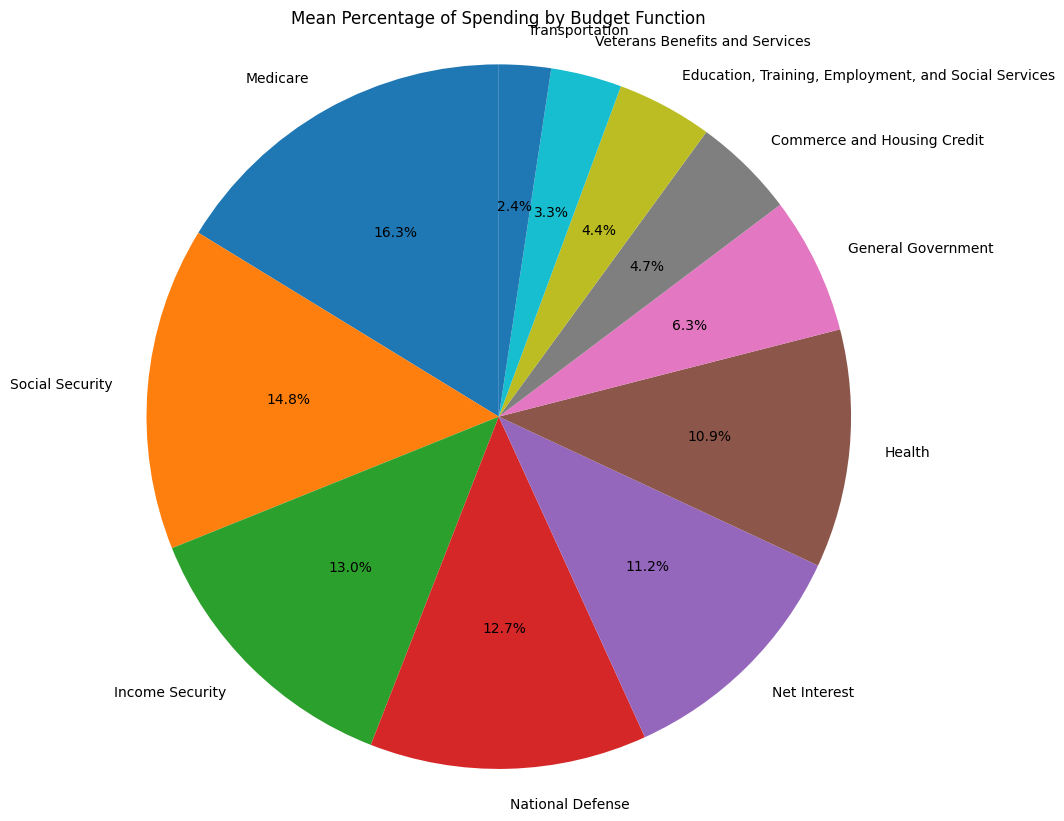

In [ ]:


import matplotlib.pyplot as plt

# Assuming 'ranked_budget_functions' is already defined as in your previous code

# Create the pie chart
plt.figure(figsize=(10, 10))  # Adjust figure size as needed
plt.pie(ranked_budget_functions, labels=ranked_budget_functions.index, autopct='%1.1f%%', startangle=90)
plt.title('Mean Percentage of Spending by Budget Function')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [ ]:


# Assuming df is already defined as in your previous code and contains the necessary columns.

# Filter for Medicare budget function
medicare_df = df[df['budget_function'] == 'Medicare']

# Group by the specified columns and sum the outlays
medicare_spending = medicare_df.groupby(['budget_subfunction', 'federal_account_name', 'program_activity_name', 'object_class_name'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

# Find the row with the maximum spending
max_spending_row = medicare_spending.loc[medicare_spending['gross_outlays_delivered_orders_paid_total'].idxmax()]

# Print the result
max_spending_row

,27
budget_subfunction,Medicare
federal_account_name,Federal Supplementary Medical Insurance Trust ...
program_activity_name,"BENEFIT PAYMENTS, SMI"
object_class_name,Insurance claims and indemnities
gross_outlays_delivered_orders_paid_total,2305766747696.759766


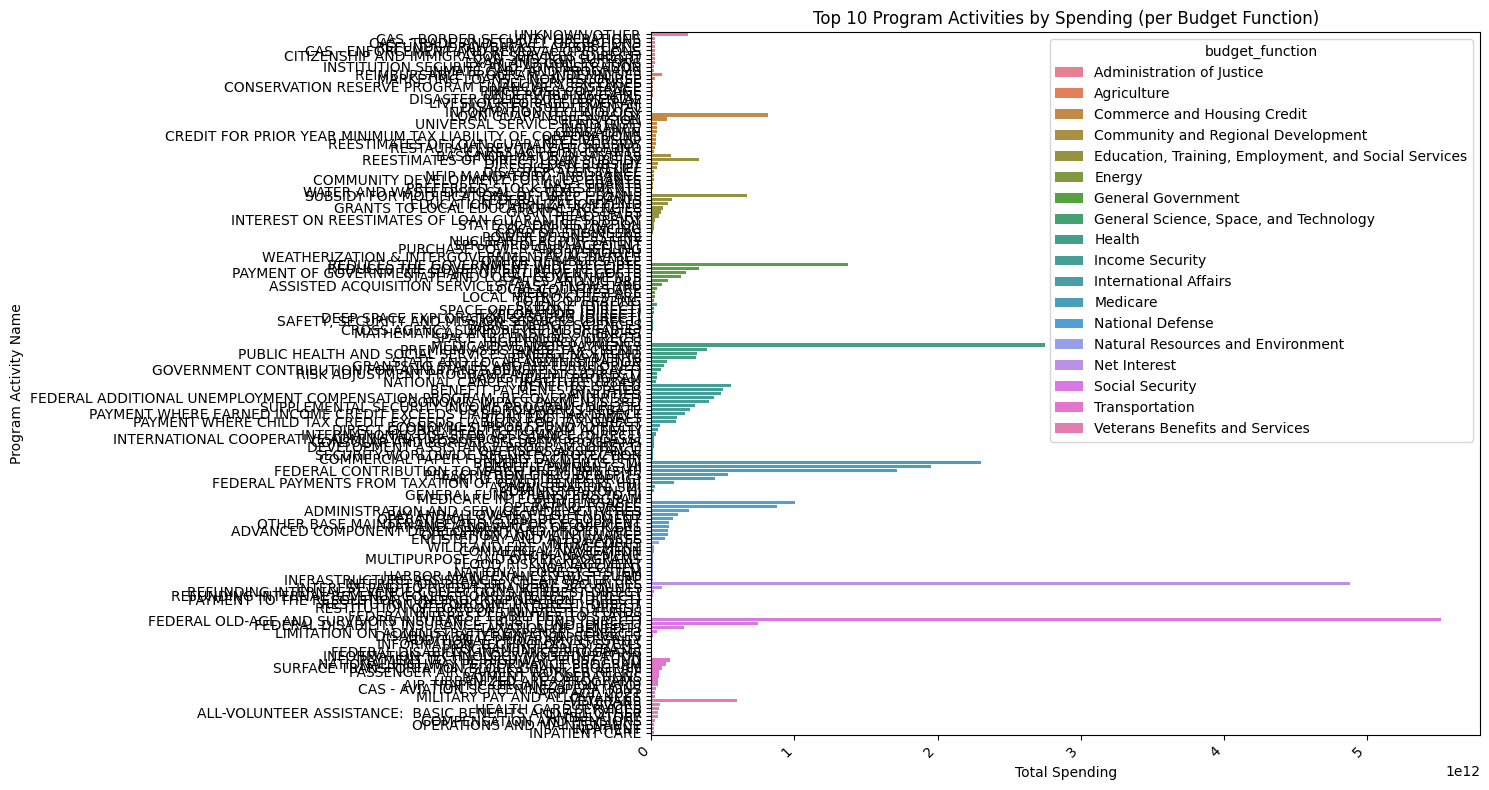

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df', 'ranked_budget_functions' are defined as in the previous code

# Filter out rows with zero spending
df_filtered = df[df['gross_outlays_delivered_orders_paid_total'] > 0]

# Group by 'budget_function' and 'program_activity_name', then sum spending
spending_by_program = df_filtered.groupby(['budget_function', 'program_activity_name'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()


# Sort by spending within each budget function
spending_by_program = spending_by_program.sort_values(['budget_function', 'gross_outlays_delivered_orders_paid_total'], ascending=[True, False])

# Get the top 10 program activities for each budget function
top_10_programs = spending_by_program.groupby('budget_function').head(10)


plt.figure(figsize=(15, 8))
sns.barplot(x='gross_outlays_delivered_orders_paid_total',
            y='program_activity_name',
            hue='budget_function',
            data=top_10_programs,
            dodge=False)  # dodge=False to stack bars for the same program across budget functions


plt.xlabel('Total Spending')
plt.ylabel('Program Activity Name')
plt.title('Top 10 Program Activities by Spending (per Budget Function)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

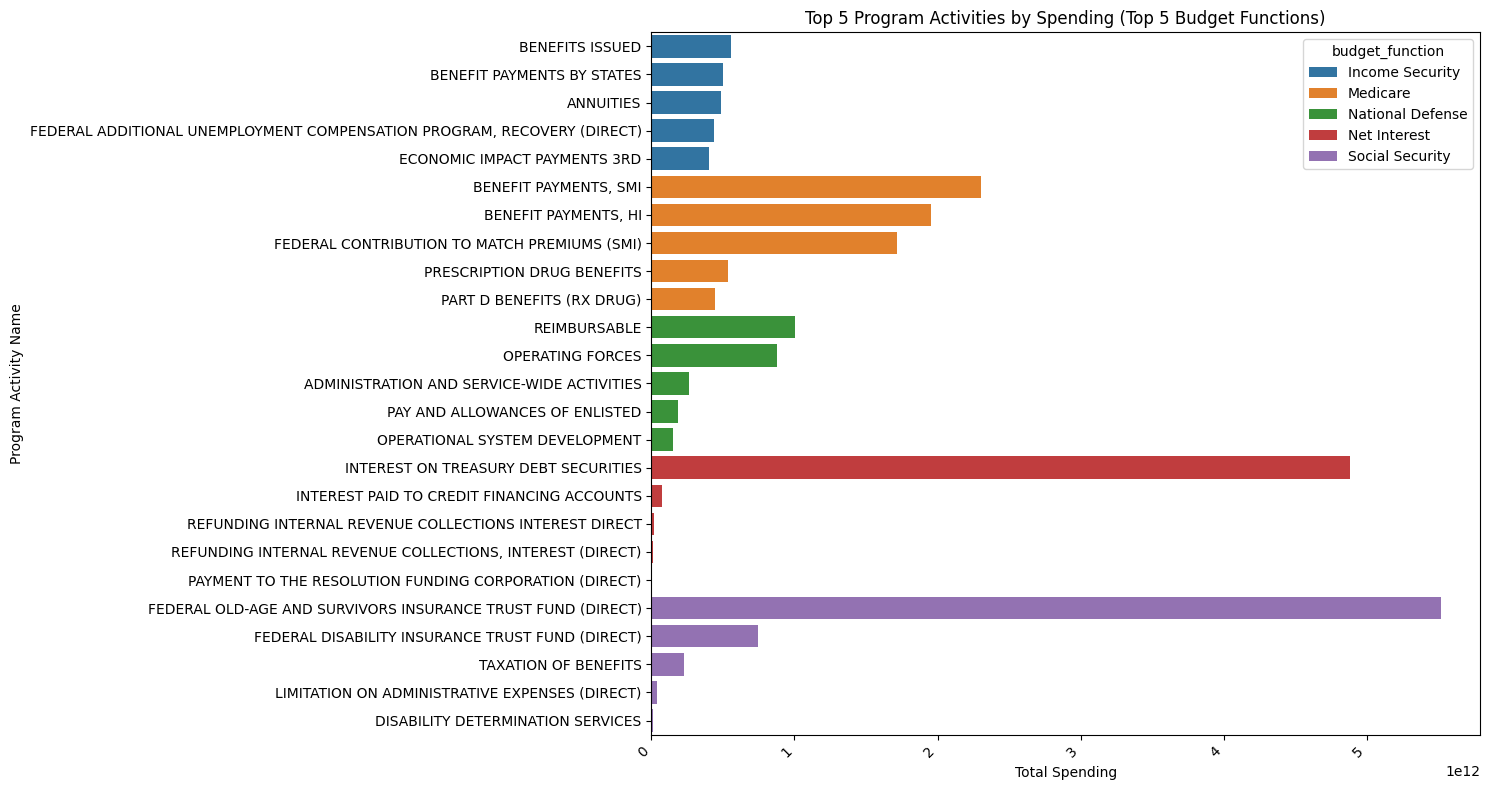

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df', 'ranked_budget_functions' are defined as in the previous code

# Filter out rows with zero spending
df_filtered = df[df['gross_outlays_delivered_orders_paid_total'] > 0]

# Group by 'budget_function' and 'program_activity_name', then sum spending
spending_by_program = df_filtered.groupby(['budget_function', 'program_activity_name'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

# Get the top 5 budget functions
top_5_budget_functions = ranked_budget_functions.head(5).index

# Filter the data for the top 5 budget functions
top_5_spending = spending_by_program[spending_by_program['budget_function'].isin(top_5_budget_functions)]

# Sort by spending within each budget function
top_5_spending = top_5_spending.sort_values(['budget_function', 'gross_outlays_delivered_orders_paid_total'], ascending=[True, False])

# Get the top 5 programs for each of the top 5 budget functions
top_programs = top_5_spending.groupby('budget_function').head(5)


plt.figure(figsize=(15, 8))
sns.barplot(x='gross_outlays_delivered_orders_paid_total',
            y='program_activity_name',
            hue='budget_function',
            data=top_programs,
            dodge=False)  # dodge=False to stack bars for the same program across budget functions


plt.xlabel('Total Spending')
plt.ylabel('Program Activity Name')
plt.title('Top 5 Program Activities by Spending (Top 5 Budget Functions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

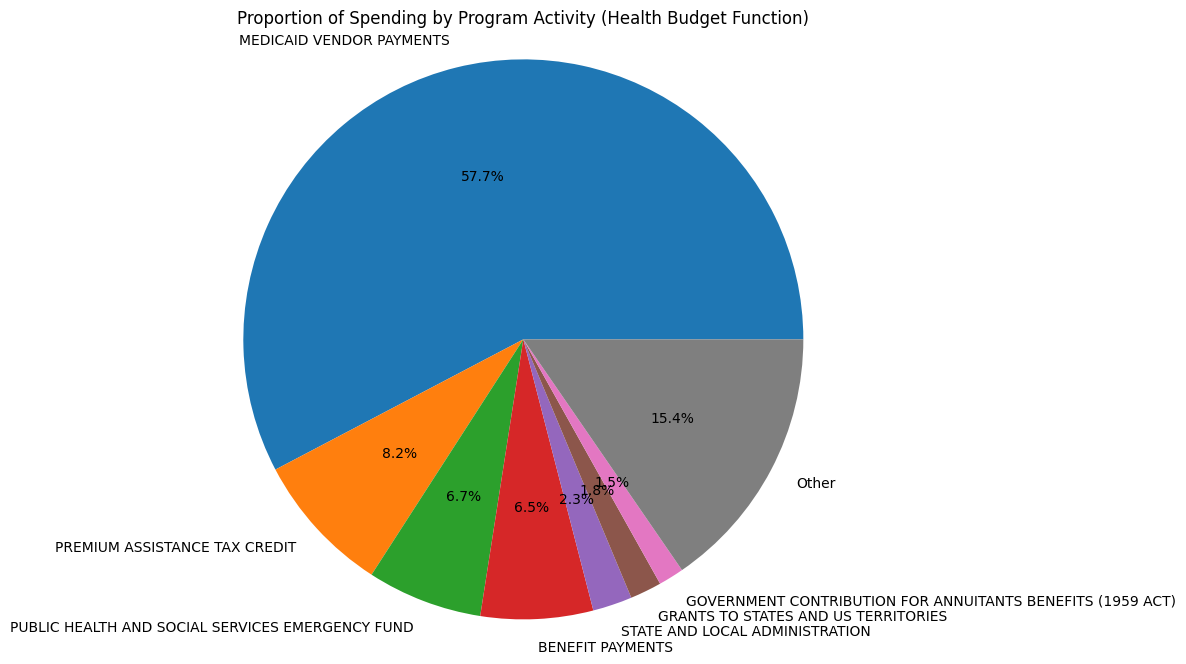

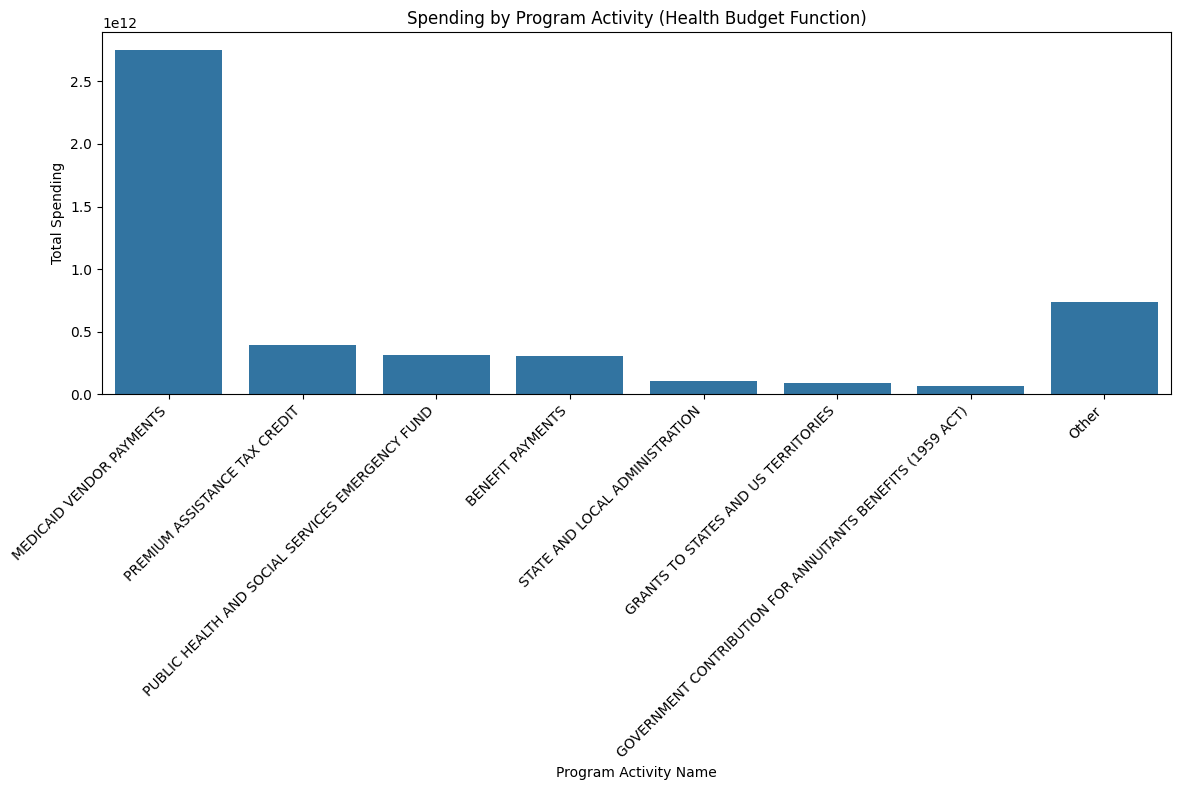

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already defined and contains the necessary columns

# Filter for 'health' budget function
health_df = df[df['budget_function'] == 'Health']

# Group by program activity and sum spending
program_spending = health_df.groupby('program_activity_name')['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

# Sort by spending in descending order
program_spending = program_spending.sort_values('gross_outlays_delivered_orders_paid_total', ascending=False)

# Define a threshold for 'other' category
spending_threshold = program_spending['gross_outlays_delivered_orders_paid_total'].sum() * 0.01  # 1% of total spending

# Combine smaller categories into 'other'
other_spending = program_spending[program_spending['gross_outlays_delivered_orders_paid_total'] < spending_threshold].sum()
other_spending['program_activity_name'] = 'Other'
program_spending = program_spending[program_spending['gross_outlays_delivered_orders_paid_total'] >= spending_threshold]
program_spending = pd.concat([program_spending, other_spending.to_frame().T], ignore_index=True)

# Create the plot
plt.figure(figsize=(12, 8))
plt.pie(program_spending['gross_outlays_delivered_orders_paid_total'], labels=program_spending['program_activity_name'], autopct='%1.1f%%')
plt.title('Proportion of Spending by Program Activity (Health Budget Function)')
plt.axis('equal')
plt.show()

# Bar plot for spending
plt.figure(figsize=(12, 8))
sns.barplot(x='program_activity_name', y='gross_outlays_delivered_orders_paid_total', data=program_spending)
plt.xlabel('Program Activity Name')
plt.ylabel('Total Spending')
plt.title('Spending by Program Activity (Health Budget Function)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:


# Assuming 'df' is already defined and contains the necessary columns

# Filter for 'Health' budget function
health_df = df[df['budget_function'] == 'Health']

# Group by budget subfunction and calculate the average annual spending
average_spending_by_subfunction = health_df.groupby('budget_subfunction')['gross_outlays_delivered_orders_paid_total'].mean()

# Print the result
average_spending_by_subfunction


,gross_outlays_delivered_orders_paid_total
budget_subfunction,
Consumer and occupational health and safety,1.028615e+07
Health care services,3.285427e+08
Health care services; Health research and training,1.253366e+08
Health research and training,3.323535e+07


In [ ]:


import pandas as pd

# Assuming 'df' is already defined as in your previous code

# Filter for Medicare budget function
medicare_df = df[df['budget_function'] == 'Medicare']

# Group by sub_function, program, and calculate spending proportion
medicare_spending = medicare_df.groupby(['budget_subfunction', 'program_activity_name'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

# Calculate the total spending for Medicare
total_medicare_spending = medicare_spending['gross_outlays_delivered_orders_paid_total'].sum()

# Calculate the spending proportion
medicare_spending['spending_proportion'] = (medicare_spending['gross_outlays_delivered_orders_paid_total'] / total_medicare_spending) * 100

# Sort by spending proportion in descending order
medicare_spending = medicare_spending.sort_values('spending_proportion', ascending=False)

# Display the result
medicare_spending

,budget_subfunction,program_activity_name,gross_outlays_delivered_orders_paid_total,spending_proportion
6,Medicare,"BENEFIT PAYMENTS, SMI",2.304901e+12,32.068116
5,Medicare,"BENEFIT PAYMENTS, HI",1.955192e+12,27.202607
10,Medicare,FEDERAL CONTRIBUTION TO MATCH PREMIUMS (SMI),1.714903e+12,23.859472
20,Medicare,PRESCRIPTION DRUG BENEFITS,5.374213e+11,7.477149
17,Medicare,PART D BENEFITS (RX DRUG),4.419548e+11,6.148922
12,Medicare,FEDERAL PAYMENTS FROM TAXATION OF OASDI BENEFI...,1.594530e+11,2.218472
1,Medicare,"ADMINISTRATION, SMI",2.667766e+10,0.371167
0,Medicare,"ADMINISTRATION, HI",1.783206e+10,0.248098
13,Medicare,GENERAL FUND TRANSFERS TO HI,6.992575e+09,0.097288
14,Medicare,MEDICARE INTEGRITY PROGRAM,5.116387e+09,0.071184


In [ ]:


def health(df):
    # Filter for the 'Health' budget function
    health_df = df[df['budget_function'] == 'Health']

    # Group by fiscal year, program activity, and calculate total spending
    health_spending_by_program = health_df.groupby(['fiscal_year', 'program_activity_name'])['gross_outlays_delivered_orders_paid_total'].sum().reset_index()

    # Calculate total spending for each year
    total_spending_by_year = health_spending_by_program.groupby('fiscal_year')['gross_outlays_delivered_orders_paid_total'].sum()

    # Merge total spending back into the main dataframe
    health_spending_by_program = health_spending_by_program.merge(total_spending_by_year, on='fiscal_year', suffixes=('', '_total'))

    # Calculate spending percentage
    health_spending_by_program['spending_percentage'] = (health_spending_by_program['gross_outlays_delivered_orders_paid_total'] / health_spending_by_program['gross_outlays_delivered_orders_paid_total_total']) * 100

    # Sort values by spending percentage for each year in descending order
    health_spending_by_program = health_spending_by_program.sort_values(['fiscal_year', 'spending_percentage'], ascending=[True, False])

    # Display the result
    return health_spending_by_program[['fiscal_year', 'program_activity_name', 'spending_percentage']]

# Assuming 'df' is defined as in your previous code
result_df = health(df)
result_df

,fiscal_year,program_activity_name,spending_percentage
124,2020,MEDICAID VENDOR PAYMENTS,5.373128e+01
199,2020,PUBLIC HEALTH AND SOCIAL SERVICES EMERGENCY FUND,1.303632e+01
18,2020,BENEFIT PAYMENTS,6.675502e+00
188,2020,PREMIUM ASSISTANCE TAX CREDIT,6.316311e+00
229,2020,STATE AND LOCAL ADMINISTRATION,2.388523e+00
...,...,...,...
1246,2024,REIMBURSABLE PROGRAM ACTIVITY (OPP),0.000000e+00
1280,2024,TRANSITIONAL REINSURANCE PAYMENTS,0.000000e+00
1290,2024,ZIKA ACTIVITIES,-1.771930e-08
1284,2024,UNDISTRIBUTED,-7.649129e-04


In [ ]:
medicaid_coverage = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/Medicaid_Population_Structured.csv')

In [ ]:
us_population = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/US_Population_Structured.csv')

In [ ]:
us_population_new = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/US_Population_Structured_new.csv')

In [ ]:
uninsured = pd.read_csv('/content/drive/MyDrive/不能轻松拿下AGA/Data/Uninsured_Population_Summary.csv')

In [ ]:
medicaid_coverage.head()

,Gender,Age Group,Medicaid Status,Population,Margin of Error
0,Total,Total,Total,329987997,20494
1,Male,Total,Total,162207326,37874
2,Male,Under 6 years,Total,11312928,36107
3,Male,Under 6 years,With Medicaid,4760607,44208
4,Male,Under 6 years,No Medicaid,6552321,41784


In [ ]:
df = medicaid_coverage.copy()

def categorize_age_group(age_group):
    if age_group in ['Under 6 years', '6 to 18 years']:
        return "Children"
    elif age_group in ['19 to 25 years', '26 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 64 years']:
        return "Adults"
    elif age_group in ['65 to 74 years', '75 years and over']:
        return "Elder"
    else:
        return "Unknown"

# Apply the categorization
df["Age Category"] = df["Age Group"].apply(categorize_age_group)

# Filter out unknown categories
df_filtered = df[df["Age Category"] != "Unknown"]

# Group by Age Category and Medicaid Status to get population counts
summary_df = df_filtered.groupby(["Age Category", "Medicaid Status"])["Population"].sum().reset_index()

# Display the final dataset
summary_df

,Age Category,Medicaid Status,Population
0,Adults,No Medicaid,163089508
1,Adults,Total,195039313
2,Adults,With Medicaid,31949805
3,Children,No Medicaid,47040730
4,Children,Total,77057243
5,Children,With Medicaid,30016513
6,Elder,No Medicaid,49529821
7,Elder,Total,57891441
8,Elder,With Medicaid,8361620


In [ ]:
df_new_population = us_population_new.copy()

# Define function to categorize age groups in the new dataset
def categorize_age_group_new(age_category):
    if "Under" in age_category or "to 9 years" in age_category or "to 14 years" in age_category or "15 to 18 years" in age_category:
        return "Children"
    elif "65 to" in age_category or "75 years" in age_category or "85 years" in age_category:
        return "Elder"
    else:
        return "Adults"

# Apply categorization
df_new_population["Age Category"] = df_new_population["AGE Category"].apply(lambda x: categorize_age_group_new(str(x)))

# Group by Age Category to get total population count
summary_new_population_df = df_new_population.groupby("Age Category")["Total Population"].sum().reset_index()

# Display the processed dataset
summary_new_population_df

,Age Category,Total Population
0,Adults,250428861
1,Children,59337006
2,Elder,25149029


In [ ]:
df_uninsured_new = uninsured.copy()

# Clean the "Age Category" column to remove unexpected characters
df_uninsured_new["Age Category"] = df_uninsured_new["Age Category"].str.replace(r"\?+", "", regex=True).str.strip()

# Remove pre-aggregated categories ("Under 19 years", "19 to 64 years", "65 years and older")
df_uninsured_filtered_new = df_uninsured_new[~df_uninsured_new["Age Category"].isin(["Under 19 years", "19 to 64 years", "65 years and older"])]

# Define function to categorize age groups
def categorize_age_group_uninsured_new(age_category):
    if age_category in ["Under 6 years", "6 to 18 years"]:
        return "Children"
    elif age_category in ["19 to 25 years", "26 to 34 years", "35 to 44 years",
                          "45 to 54 years", "55 to 64 years"]:
        return "Adults"
    elif age_category in ["65 to 74 years", "75 years and older"]:
        return "Elder"
    else:
        return "Unknown"

# Apply categorization
df_uninsured_filtered_new["Age Group Category"] = df_uninsured_filtered_new["Age Category"].apply(categorize_age_group_uninsured_new)

# Aggregating the uninsured population by Age Group Category
summary_uninsured_new_df = df_uninsured_filtered_new.groupby("Age Group Category")["Population"].sum().reset_index()

# Display the cleaned and categorized dataset
summary_uninsured_new_df

,Age Group Category,Population
0,Adults,21535462
1,Children,4155019
2,Elder,479171


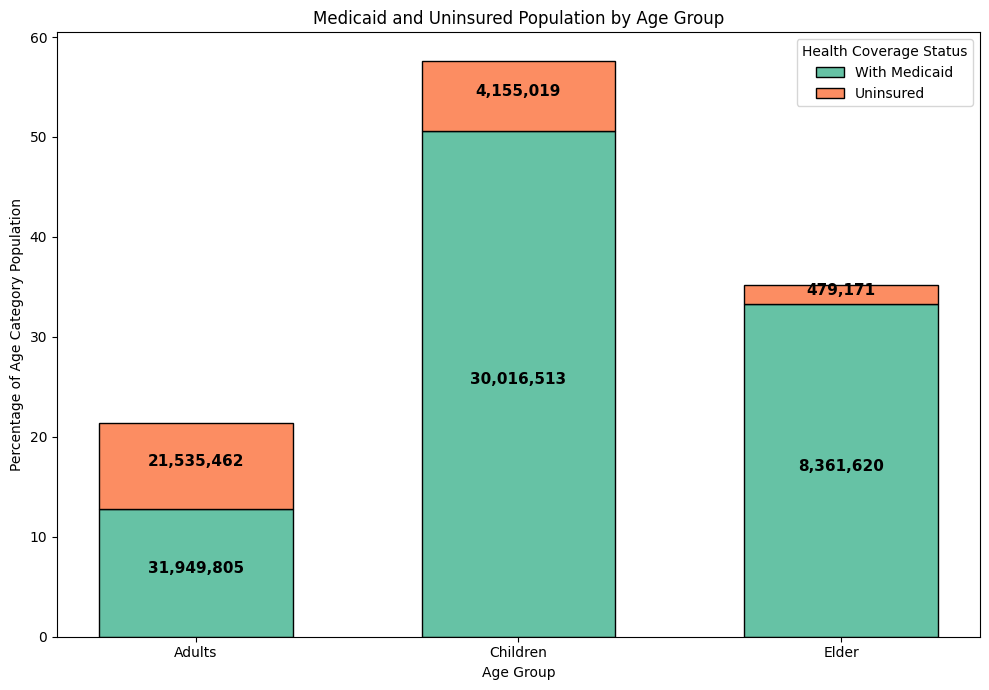

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
summary_df = pd.DataFrame({
    "Age Category": ["Adults", "Adults", "Adults", "Children", "Children", "Children", "Elder", "Elder", "Elder"],
    "Medicaid Status": ["No Medicaid", "Total", "With Medicaid", "No Medicaid", "Total", "With Medicaid", "No Medicaid", "Total", "With Medicaid"],
    "Population": [163089508, 195039313, 31949805, 47040730, 77057243, 30016513, 49529821, 57891441, 8361620]
})

summary_uninsured_new_df = pd.DataFrame({
    "Age Category": ["Adults", "Children", "Elder"],
    "Population_Uninsured": [21535462, 4155019, 479171]
})

summary_new_population_df = pd.DataFrame({
    "Age Category": ["Adults", "Children", "Elder"],
    "Total Population": [250428861, 59337006, 25149029]
})

# Filtering only "With Medicaid" data and renaming properly
medicaid_df = summary_df[summary_df["Medicaid Status"] == "With Medicaid"].copy()
medicaid_df = medicaid_df.rename(columns={"Population": "Population_Medicaid"})[["Age Category", "Population_Medicaid"]]

# Merging Medicaid and uninsured population data
merged_health_df = medicaid_df.merge(summary_uninsured_new_df, on="Age Category", how="left")

# Merging with total population data
merged_health_df = merged_health_df.merge(summary_new_population_df, on="Age Category", how="left")

# Checking if "Population_Medicaid" exists after merge
if "Population_Medicaid" not in merged_health_df.columns:
    raise KeyError("Column 'Population_Medicaid' is missing after merging. Ensure correct renaming before merging.")

# Calculating percentages
merged_health_df["With Medicaid %"] = (merged_health_df["Population_Medicaid"] / merged_health_df["Total Population"]) * 100
merged_health_df["Uninsured %"] = (merged_health_df["Population_Uninsured"] / merged_health_df["Total Population"]) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Stacked bars for "With Medicaid" and "Uninsured"
ax.bar(merged_health_df["Age Category"], merged_health_df["With Medicaid %"],
       label="With Medicaid", color="#66c2a5", edgecolor="black", width=0.6)

ax.bar(merged_health_df["Age Category"], merged_health_df["Uninsured %"],
       bottom=merged_health_df["With Medicaid %"], label="Uninsured",
       color="#fc8d62", edgecolor="black", width=0.6)

# Adding annotations for population values
for index, row in merged_health_df.iterrows():
    with_medicaid = row["Population_Medicaid"]
    uninsured = row["Population_Uninsured"]

    # Annotate Medicaid population
    ax.annotate(f'{with_medicaid:,.0f}',
                xy=(index, row["With Medicaid %"] / 2),
                ha='center', fontsize=11, fontweight='bold', color="black")

    # Annotate Uninsured population
    ax.annotate(f'{uninsured:,.0f}',
                xy=(index, row["With Medicaid %"] + (row["Uninsured %"] / 2)),
                ha='center', fontsize=11, fontweight='bold', color="black")

# Formatting the chart
ax.set_ylabel("Percentage of Age Category Population")
ax.set_xlabel("Age Group")
ax.set_title("Medicaid and Uninsured Population by Age Group")
ax.legend(title="Health Coverage Status", loc="upper right")

# Display the plot with improved spacing
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


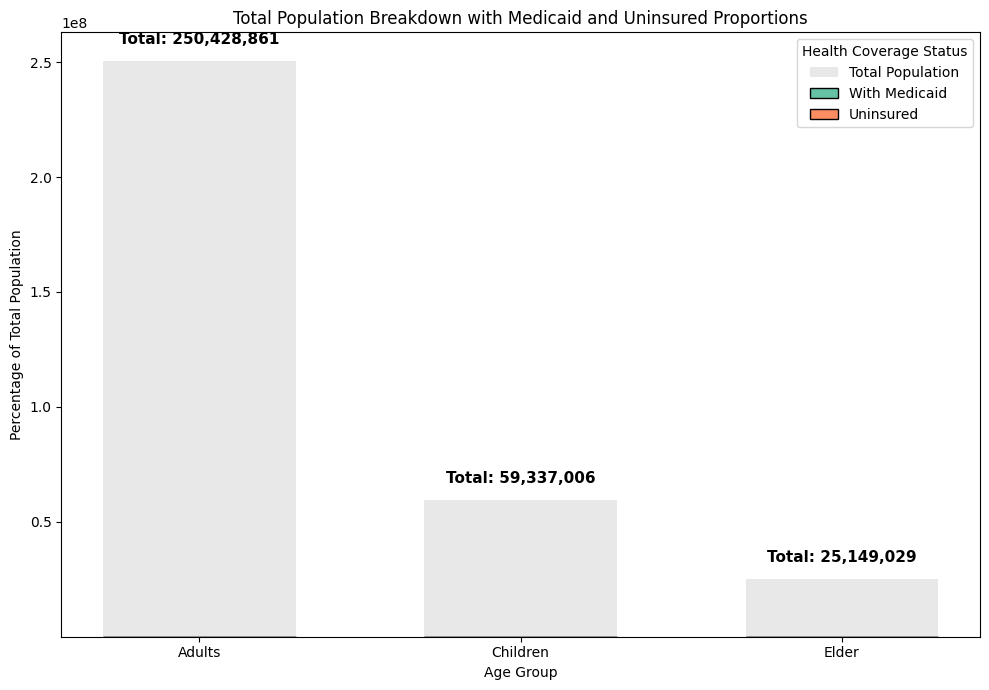

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load datasets
summary_df = pd.DataFrame({
    "Age Category": ["Adults", "Adults", "Adults", "Children", "Children", "Children", "Elder", "Elder", "Elder"],
    "Medicaid Status": ["No Medicaid", "Total", "With Medicaid", "No Medicaid", "Total", "With Medicaid", "No Medicaid", "Total", "With Medicaid"],
    "Population": [163089508, 195039313, 31949805, 47040730, 77057243, 30016513, 49529821, 57891441, 8361620]
})

summary_uninsured_new_df = pd.DataFrame({
    "Age Category": ["Adults", "Children", "Elder"],
    "Population_Uninsured": [21535462, 4155019, 479171]
})

summary_new_population_df = pd.DataFrame({
    "Age Category": ["Adults", "Children", "Elder"],
    "Total Population": [250428861, 59337006, 25149029]
})

# Filtering only "With Medicaid" data
medicaid_df = summary_df[summary_df["Medicaid Status"] == "With Medicaid"].copy()
medicaid_df = medicaid_df.rename(columns={"Population": "Population_Medicaid"})

# Merge Medicaid and uninsured population data
merged_health_df = medicaid_df.merge(summary_uninsured_new_df, on="Age Category", how="left")

# Merge with total population data
merged_health_df = merged_health_df.merge(summary_new_population_df, on="Age Category", how="left")

# Calculate percentages
merged_health_df["With Medicaid %"] = (merged_health_df["Population_Medicaid"] / merged_health_df["Total Population"]) * 100
merged_health_df["Uninsured %"] = (merged_health_df["Population_Uninsured"] / merged_health_df["Total Population"]) * 100

# Plot total population first for better layering
fig, ax = plt.subplots(figsize=(10, 7))

# Total population as a reference layer
ax.bar(merged_health_df["Age Category"], merged_health_df["Total Population"],
       color="lightgray", label="Total Population", width=0.6, alpha=0.5)

# Overlaying Medicaid and Uninsured status as stacked bars
bottom_bar = np.zeros(len(merged_health_df))
for status, color in zip(["With Medicaid", "Uninsured"], ["#66c2a5", "#fc8d62"]):
    values = merged_health_df[f"{status} %"]
    ax.bar(merged_health_df["Age Category"], values, bottom=bottom_bar, label=status,
           width=0.6, color=color, edgecolor="black")
    bottom_bar += values

# Adding annotations for total population numbers
for idx, row in merged_health_df.iterrows():
    ax.annotate(f'Total: {row["Total Population"]:,.0f}',
                xy=(idx, row["Total Population"]),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Formatting the chart
ax.set_ylabel("Percentage of Total Population")
ax.set_xlabel("Age Group")
ax.set_title("Total Population Breakdown with Medicaid and Uninsured Proportions")
ax.legend(title="Health Coverage Status", loc="upper right")

# Display the plot with improved spacing
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

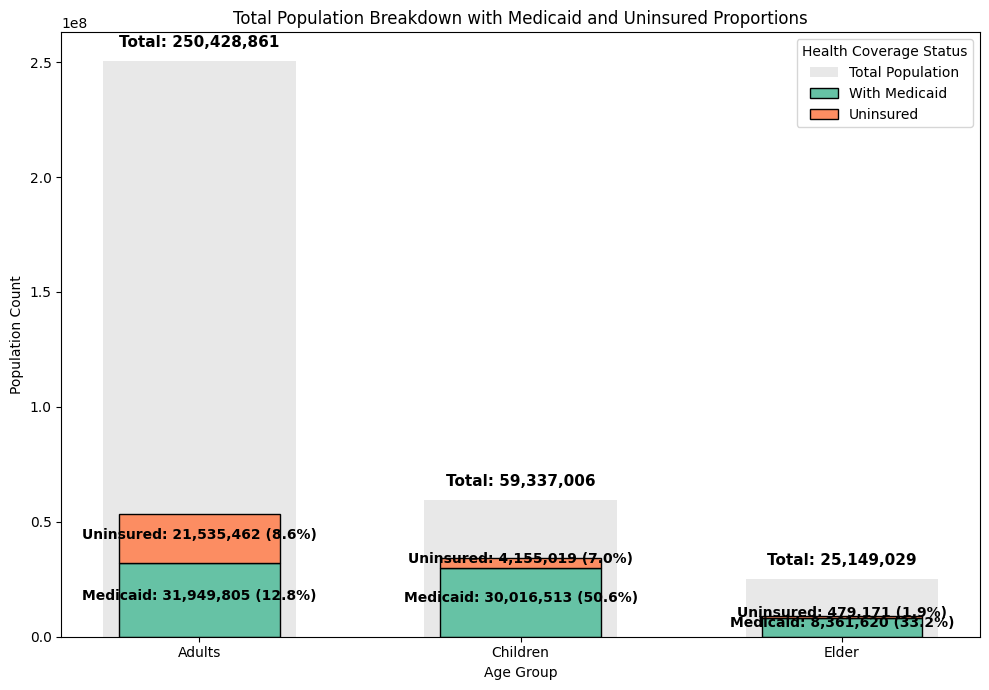

In [ ]:
# Reload the dataset and redefine merged dataframe to ensure correct layering
fig, ax = plt.subplots(figsize=(10, 7))

# Plot total population first for proper layering
ax.bar(merged_health_df["Age Category"], merged_health_df["Total Population"],
       color="lightgray", label="Total Population", width=0.6, alpha=0.5)

# Overlaying Medicaid and Uninsured status as stacked bars with proper layering
bottom_bar = np.zeros(len(merged_health_df))
for status, color in zip(["With Medicaid", "Uninsured"], ["#66c2a5", "#fc8d62"]):
    values = merged_health_df[f"{status} %"] * merged_health_df["Total Population"] / 100  # Convert percentage to absolute numbers
    ax.bar(merged_health_df["Age Category"], values, bottom=bottom_bar, label=status,
           width=0.5, color=color, edgecolor="black")
    bottom_bar += values

# Adding annotations for total population numbers and proportions
for index, row in merged_health_df.iterrows():
    total_population = row["Total Population"]
    with_medicaid = row["Population_Medicaid"]
    uninsured = row["Population_Uninsured"]

    # Annotate Total Population
    ax.annotate(f'Total: {total_population:,.0f}',
                xy=(index, total_population),
                xytext=(0, 10),
                textcoords="offset points",
                ha='center', fontsize=11, fontweight='bold', color="black")

    # Annotate Medicaid population with percentage
    ax.annotate(f'Medicaid: {with_medicaid:,.0f} ({row["With Medicaid %"]:.1f}%)',
                xy=(index, with_medicaid / 2),
                ha='center', fontsize=10, fontweight='bold', color="black")

    # Annotate Uninsured population with percentage
    ax.annotate(f'Uninsured: {uninsured:,.0f} ({row["Uninsured %"]:.1f}%)',
                xy=(index, with_medicaid + (uninsured / 2)),
                ha='center', fontsize=10, fontweight='bold', color="black")

# Formatting the chart
ax.set_ylabel("Population Count")
ax.set_xlabel("Age Group")
ax.set_title("Total Population Breakdown with Medicaid and Uninsured Proportions")
ax.legend(title="Health Coverage Status", loc="upper right")

# Display the plot with improved spacing
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:

import altair as alt
import pandas as pd

# Filter out the "Total" rows for Gender and Medicaid Status
medicaid_filtered = medicaid_coverage[
    (medicaid_coverage["Gender"] != "Total") & (medicaid_coverage["Medicaid Status"] != "Total")
]


# Define the order of age groups
age_group_order = [
    "Under 6 years",
    "6 to 18 years",
    "19 to 34 years",
    "35 to 44 years",
    "45 to 54 years",
    "55 to 64 years",
    "65 to 74 years",
    "75 to 84 years",
    "85 years and over",
]

# Create the bar chart
chart = (
    alt.Chart(medicaid_filtered)
    .mark_bar()
    .encode(
        x=alt.X("Age Group", sort=age_group_order, title="Age Group"),  # Sort age groups
        y=alt.Y("Population", title="Population"),
        color="Medicaid Status",  # Color by Medicaid status
        tooltip=["Age Group", "Medicaid Status", "Population"]
    )
    .properties(title="Population by Age Group and Medicaid Status")
)


chart

alt.Chart(...)

In [ ]:

# Assuming medicaid_coverage is already defined as in your previous code

# Create a new column 'Age_Group_3' based on the age group
def categorize_age(age_group):
    if "Under 6 years" in age_group or "6 to 18 years" in age_group:
        return "children"
    elif "19 to 34 years" in age_group or "35 to 44 years" in age_group or "45 to 54 years" in age_group or "55 to 64 years" in age_group:
        return "adults"
    elif "65 to 74 years" in age_group or "75 to 84 years" in age_group or "85 years and over" in age_group:
        return "elder"
    else:
        return "Unknown"  # Handle any unexpected age groups


medicaid_coverage['Age_Group_3'] = medicaid_coverage['Age Group'].apply(categorize_age)


# Create the new dataset medicaid_coverage_3
medicaid_coverage_3 = medicaid_coverage.copy()

medicaid_coverage_3.head()

,Gender,Age Group,Medicaid Status,Population,Margin of Error,Age_Group_3
0,Total,Total,Total,329987997,20494,Unknown
1,Male,Total,Total,162207326,37874,Unknown
2,Male,Under 6 years,Total,11312928,36107,children
3,Male,Under 6 years,With Medicaid,4760607,44208,children
4,Male,Under 6 years,No Medicaid,6552321,41784,children


In [ ]:
medicaid_coverage_3.head()

,Gender,Age Group,Medicaid Status,Population,Margin of Error,Age_Group_3
0,Total,Total,Total,329987997,20494,Unknown
1,Male,Total,Total,162207326,37874,Unknown
2,Male,Under 6 years,Total,11312928,36107,children
3,Male,Under 6 years,With Medicaid,4760607,44208,children
4,Male,Under 6 years,No Medicaid,6552321,41784,children


In [ ]:

import pandas as pd
import altair as alt

# Filter out rows where Age_Group_3 is 'Unknown' or Medicaid Status is 'Total'
medicaid_filtered = medicaid_coverage_3[
    (medicaid_coverage_3['Age_Group_3'] != 'Unknown') &
    (medicaid_coverage_3['Medicaid Status'] != 'Total')
]

# Create the bar chart
chart = alt.Chart(medicaid_filtered).mark_bar().encode(
    x=alt.X('Age_Group_3:N', title='Age Group'),
    y=alt.Y('Population:Q', title='Population with Medicaid Status'),
    color=alt.Color('Medicaid Status:N', title='Medicaid Status')
).properties(title='Population with Medicaid by Age Group')

chart.display()

alt.Chart(...)

In [ ]:

# Assuming medicaid_coverage_3 is already defined as in your previous code

# Filter out rows where Age_Group_3 is 'Unknown' or Medicaid Status is 'Total'
medicaid_filtered = medicaid_coverage_3[
    (medicaid_coverage_3['Age_Group_3'] != 'Unknown') &
    (medicaid_coverage_3['Medicaid Status'] != 'Total')
]

# Group by Age_Group_3 and Medicaid Status, then sum the population
age_medicaid_counts = medicaid_filtered.groupby(['Age_Group_3', 'Medicaid Status'])['Population'].sum().reset_index()

# Display the resulting DataFrame
age_medicaid_counts

,Age_Group_3,Medicaid Status,Population
0,adults,No Medicaid,106487727
1,adults,With Medicaid,18947448
2,children,No Medicaid,47040730
3,children,With Medicaid,30016513
4,elder,No Medicaid,29594814
5,elder,With Medicaid,4808249


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Age_Group_3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Medicaid Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Group_3')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Group_3', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Medicaid Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Medicaid Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Age_Group_3')):
  _plot_series(series, series_name, i)
  fig.legend(title='Age_Group_3', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Medicaid Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Medicaid Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Medicaid Status'].value_counts()
    for x_label, grp in _df_11.groupby('Age_Group_3')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age_Group_3')
_ = plt.ylabel('Medicaid Status')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Age_Group_3'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Age_Group_3', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Medicaid Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Medicaid Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Age_Group_3'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Population', y='Age_Group_3', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Medicaid Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Population', y='Medicaid Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
us_population.head()

,Category,Total Population,Margin of Error,Percentage,Percentage Margin of Error,Male Population,Male Margin of Error,Male Percentage,Male Percentage Margin of Error,Female Population,Female Margin of Error,Female Percentage,Female Percentage Margin of Error
0,Total Population,334914896.0,*****,(X),(X),165729373,34559,(X),(X),169185523,34560,(X),(X)
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 5 years,18333697.0,19410,5.5,0.1,9373156,20571,5.7,0.1,8960541,19554,5.3,0.1
3,5 to 9 years,19799430.0,58324,5.9,0.1,10136158,45673,6.1,0.1,9663272,43765,5.7,0.1
4,10 to 14 years,21203879.0,52238,6.3,0.1,10877744,45167,6.6,0.1,10326135,41770,6.1,0.1


In [ ]:


import pandas as pd
# Create a copy to avoid modifying the original dataframe
new_us_population = us_population.copy()

# Function to categorize age groups
def categorize_age(age_group):
    if 'to' in age_group:
        min_age = int(age_group.split(' to ')[0])
        max_age = int(age_group.split(' to ')[1].replace(' years', ''))
        if max_age < 19 :
            return 'children'
        elif min_age >= 65:
            return 'elder'
        else:
            return 'adults'
    elif 'Under' in age_group:
        max_age = int(age_group.replace('Under ', '').replace(' years', ''))
        if max_age < 19 :
            return 'children'
        else:
            return 'adults'
    elif '65 years and over' in age_group:
        return 'elder'
    elif 'Total Population' in age_group:
        return 'Total Population'
    else:
        return 'Unknown'


# Apply the function to create the new 'Age_Category' column
new_us_population['Age_Category'] = new_us_population['Category'].apply(categorize_age)

# Display the updated dataframe
print(new_us_population.head())


           Category  Total Population Margin of Error Percentage  \
0  Total Population       334914896.0           *****        (X)   
1               AGE               NaN             NaN        NaN   
2     Under 5 years        18333697.0           19410        5.5   
3      5 to 9 years        19799430.0           58324        5.9   
4    10 to 14 years        21203879.0           52238        6.3   

  Percentage Margin of Error Male Population Male Margin of Error  \
0                        (X)       165729373                34559   
1                        NaN             NaN                  NaN   
2                        0.1         9373156                20571   
3                        0.1        10136158                45673   
4                        0.1        10877744                45167   

  Male Percentage Male Percentage Margin of Error Female Population  \
0             (X)                             (X)         169185523   
1             NaN                 

In [ ]:


import pandas as pd

# Create a function to categorize age groups
def categorize_age(category):
    if "Under 5" in category or "5 to 9" in category or "10 to 14" in category or "15 to 19" in category:
        return "children"
    elif "65 to 69" in category or "70 to 74" in category or "75 to 79" in category or "80 to 84" in category or "85 years and over" in category:
        return "elder"
    else:
        return "adults"

# Apply the categorization to the 'Category' column
us_population['Age_Category'] = us_population['Category'].apply(categorize_age)

# Display the updated dataframe
us_population

,Category,Total Population,Margin of Error,Percentage,Percentage Margin of Error,Male Population,Male Margin of Error,Male Percentage,Male Percentage Margin of Error,Female Population,Female Margin of Error,Female Percentage,Female Percentage Margin of Error,Age_Category
0,Total Population,334914896.0,*****,(X),(X),165729373,34559,(X),(X),169185523,34560,(X),(X),adults
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adults
2,Under 5 years,18333697.0,19410,5.5,0.1,9373156,20571,5.7,0.1,8960541,19554,5.3,0.1,children
3,5 to 9 years,19799430.0,58324,5.9,0.1,10136158,45673,6.1,0.1,9663272,43765,5.7,0.1,children
4,10 to 14 years,21203879.0,52238,6.3,0.1,10877744,45167,6.6,0.1,10326135,41770,6.1,0.1,children
5,15 to 19 years,22168390.0,39656,6.6,0.1,11364472,27873,6.9,0.1,10803918,29000,6.4,0.1,children
6,20 to 24 years,21618383.0,37891,6.5,0.1,11073959,28559,6.7,0.1,10544424,23858,6.2,0.1,adults
7,25 to 29 years,21906706.0,31604,6.5,0.1,11090992,20863,6.7,0.1,10815714,19833,6.4,0.1,adults
8,30 to 34 years,23405056.0,26432,7.0,0.1,11811352,19766,7.1,0.1,11593704,17263,6.9,0.1,adults
9,35 to 39 years,22650099.0,74504,6.8,0.1,11437479,53269,6.9,0.1,11212620,42464,6.6,0.1,adults


In [ ]:


import pandas as pd

# Create a new DataFrame with the Age Category and its corresponding population
age_category_population = pd.DataFrame({
    'Age_Category': us_population['Age_Category'].unique(),  # Get unique age categories
    'Population': 0  # Initialize population to 0 for each category
})

# Iterate through unique age categories to sum up the populations
for category in age_category_population['Age_Category']:
    # Calculate the sum of 'Total Population' for each age category
    age_category_population.loc[age_category_population['Age_Category'] == category, 'Population'] = us_population[us_population['Age_Category'] == category]['Total Population'].sum()

# Display the resulting DataFrame
age_category_population


<ipython-input-70-fbfeea5ecd86>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '582975064.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  age_category_population.loc[age_category_population['Age_Category'] == category, 'Population'] = us_population[us_population['Age_Category'] == category]['Total Population'].sum()


,Age_Category,Population
0,adults,582975064.2
1,children,61705966.0
2,elder,25149029.0


In [ ]:


# Group by 'Age_Category' and calculate the sum of 'Total Population' for each category.
population_by_age = us_population.groupby('Age_Category')['Total Population'].sum()

# Convert the result to a DataFrame.
population_df = population_by_age.reset_index()

# Display the resulting DataFrame.
population_df

,Age_Category,Total Population
0,adults,529017607.2
1,children,81505396.0
2,elder,59307056.0


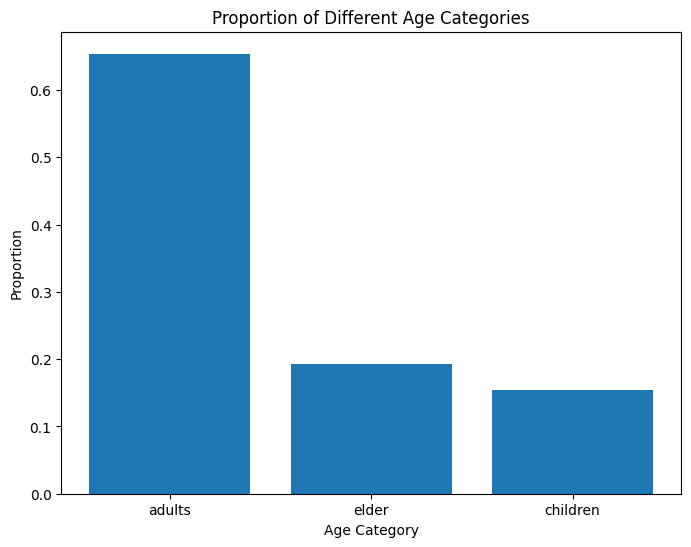

In [ ]:


import matplotlib.pyplot as plt
# Calculate the proportions of each age category
age_category_counts = us_population['Age_Category'].value_counts(normalize=True)

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(age_category_counts.index, age_category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Proportion')
plt.title('Proportion of Different Age Categories')
plt.show()

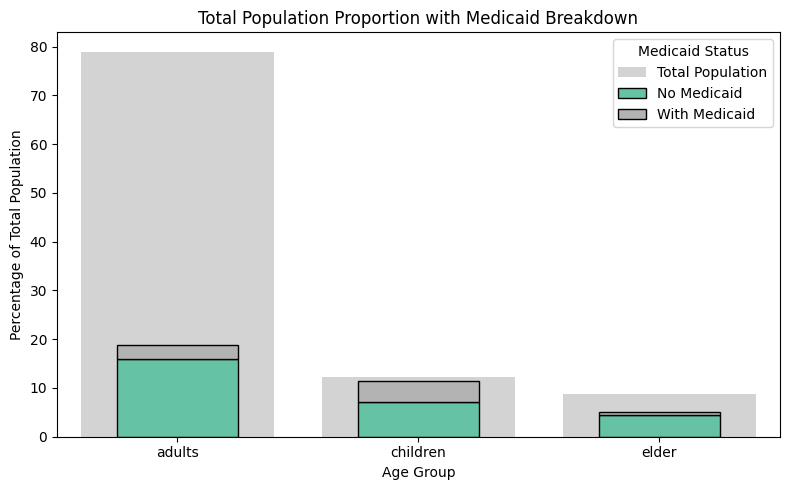

In [ ]:
# Calculating total US population
total_us_population = population_df["Total Population"].sum()

# Calculating the proportion of each age category in the total population
population_df["Population Percentage"] = (population_df["Total Population"] / total_us_population) * 100

# Merging Medicaid data to include both total population and Medicaid status
merged_df = age_medicaid_counts.merge(population_df, left_on="Age_Group_3", right_on="Age_Category")

# Calculating the percentage for each Medicaid Status within the total population
merged_df["Medicaid Percentage"] = (merged_df["Population"] / total_us_population) * 100

# Pivoting data for visualization
pivot_df = merged_df.pivot(index="Age_Group_3", columns="Medicaid Status", values="Medicaid Percentage")

# Plotting a stacked bar chart to show both total population proportions and Medicaid proportions
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the total population as bars
ax.bar(population_df["Age_Category"], population_df["Population Percentage"], color="lightgray", label="Total Population")

# Overlaying Medicaid status as stacked bars
pivot_df.plot(kind="bar", stacked=True, ax=ax, colormap="Set2", width=0.5, edgecolor="black")

# Formatting the chart
ax.set_ylabel("Percentage of Total Population")
ax.set_xlabel("Age Group")
ax.set_title("Total Population Proportion with Medicaid Breakdown")
ax.legend(title="Medicaid Status")

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


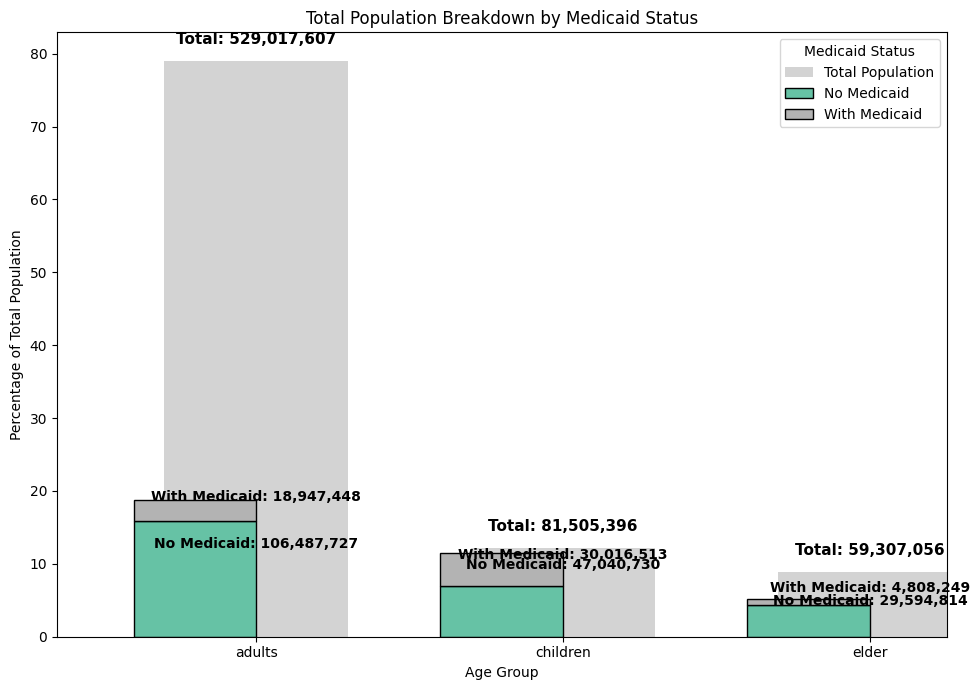

In [ ]:
# Adjusted visualization with increased spacing and labeled annotations
fig, ax = plt.subplots(figsize=(10, 7))  # Increased figure size for better spacing

# Plot total population as bars
bars_total = ax.bar(population_df["Age_Category"], population_df["Population Percentage"],
                    color="lightgray", label="Total Population", width=0.6)

# Overlaying Medicaid status as stacked bars
pivot_df.plot(kind="bar", stacked=True, ax=ax, colormap="Set2", width=0.4, edgecolor="black", position=1)

# Adding annotations for total population numbers
for bar, value in zip(bars_total, population_df["Total Population"]):
    ax.annotate(f'Total: {value:,.0f}',  # Format number with commas
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 10),  # Offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Adding annotations for No Medicaid and With Medicaid populations
for index, row in merged_df.iterrows():
    age_group = row["Age_Group_3"]
    medicaid_status = row["Medicaid Status"]
    population = row["Population"]

    # Find the position for annotation
    bar_position = population_df[population_df["Age_Category"] == age_group].index[0]
    height = pivot_df.loc[age_group].sum()  # Get total height for stacking
    y_position = height - (row["Medicaid Percentage"] / 2)  # Position at the middle of the segment

    label_text = f'{medicaid_status}: {population:,.0f}'  # Label with category name

    ax.annotate(label_text,  # Format number with commas
                xy=(bar_position, y_position),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting the chart
ax.set_ylabel("Percentage of Total Population")
ax.set_xlabel("Age Group")
ax.set_title("Total Population Breakdown by Medicaid Status")

# Adjust legend position for clarity
ax.legend(title="Medicaid Status", loc="upper right")

# Display the plot with improved spacing
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**with accurate percent number!!!**

In [ ]:
# Creating a structured DataFrame from the provided data

# Data for poverty people Medicaid coverage
data = {
    "Age Group": ["adults", "elder", "children"],
    "Other Insurance Coverage (%)": [25.00, 15.00, 1.80],
    "Medicaid Coverage (%)": [48.00, 25.00, 3.60],
    "Other Insurance Population": [583505477.56, 100479492.52, 20930841.34],
    "Medicaid Population": [1120330516.91, 167465820.87, 41861682.68],
}

# Convert to DataFrame
poverty_medicaid_df = pd.DataFrame(data)
poverty_medicaid_df

,Age Group,Other Insurance Coverage (%),Medicaid Coverage (%),Other Insurance Population,Medicaid Population
0,adults,25.0,48.0,5.835055e+08,1.120331e+09
1,elder,15.0,25.0,1.004795e+08,1.674658e+08
2,children,1.8,3.6,2.093084e+07,4.186168e+07


In [ ]:
# Creating structured DataFrames for each healthcare access category

# 1. Delayed Medical Care
delayed_medical_care = pd.DataFrame({
    "Age Group": ["adults", "elder", "children"],
    "Uninsured Coverage (%)": [20.30, 24.70, 9.70],
    "Medicaid Coverage (%)": [3.00, 7.10, 0.30]
})

# 2. Not Get Medical Care (Total)
not_get_medical_care = pd.DataFrame({
    "Category": ["Total"],
    "Uninsured Coverage (%)": [22.60],
    "Medicaid Coverage (%)": [6.90]
})

# 3. Mental Health Care (Total)
mental_health_care = pd.DataFrame({
    "Category": ["Total"],
    "Uninsured Coverage (%)": [9.60],
    "Medicaid Coverage (%)": [6.50]
})

# 4. Not Have Medicine Due to Cost (Total)
not_have_medicine = pd.DataFrame({
    "Category": ["Total"],
    "Uninsured Coverage (%)": [26.10],
    "Medicaid Coverage (%)": [9.70]
})

# 5. Have a Usual Place of Care
usual_place_of_care = pd.DataFrame({
    "Age Group": ["adults and elder", "children"],
    "Uninsured Coverage (%)": [57.10, 76.40],
    "Medicaid Coverage (%)": [88.00, 96.00]
})

# 6. Not Have Medicare Due to Monetary Factors (Total)
not_have_medicare = pd.DataFrame({
    "Category": ["Total"],
    "Uninsured Coverage (%)": [36.30],
    "Medicaid Coverage (%)": [10.30]
})



In [ ]:
delayed_medical_care

,Age Group,Uninsured Coverage (%),Medicaid Coverage (%)
0,adults,20.3,3.0
1,elder,24.7,7.1
2,children,9.7,0.3


In [ ]:
not_get_medical_care

,Category,Uninsured Coverage (%),Medicaid Coverage (%)
0,Total,22.6,6.9


In [ ]:
not_have_medicare

,Category,Uninsured Coverage (%),Medicaid Coverage (%)
0,Total,36.3,10.3


In [ ]:
not_have_medicine

,Category,Uninsured Coverage (%),Medicaid Coverage (%)
0,Total,26.1,9.7


In [ ]:
mental_health_care

,Category,Uninsured Coverage (%),Medicaid Coverage (%)
0,Total,9.6,6.5


In [ ]:
usual_place_of_care

,Age Group,Uninsured Coverage (%),Medicaid Coverage (%)
0,adults and elder,57.1,88.0
1,children,76.4,96.0


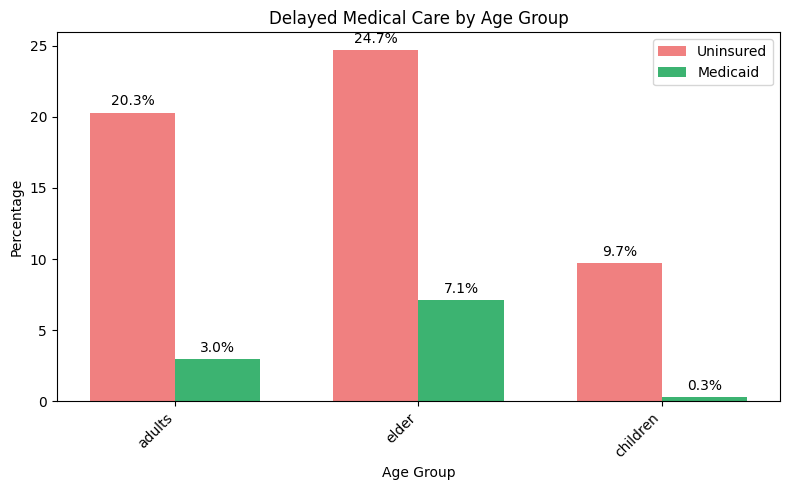

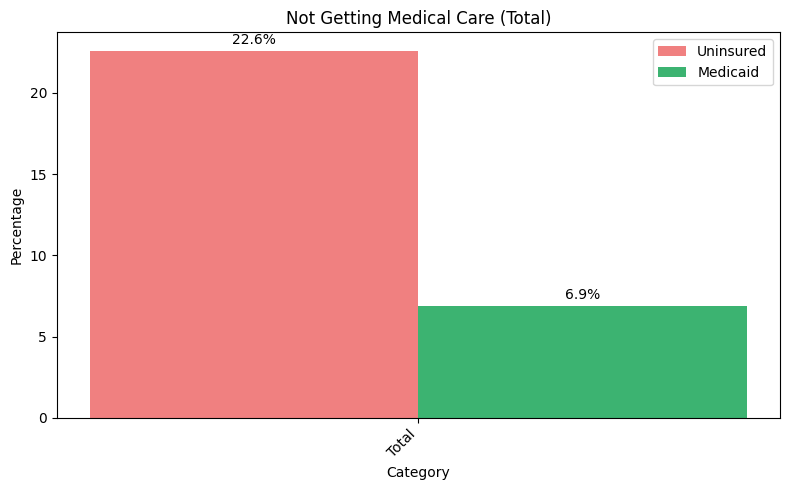

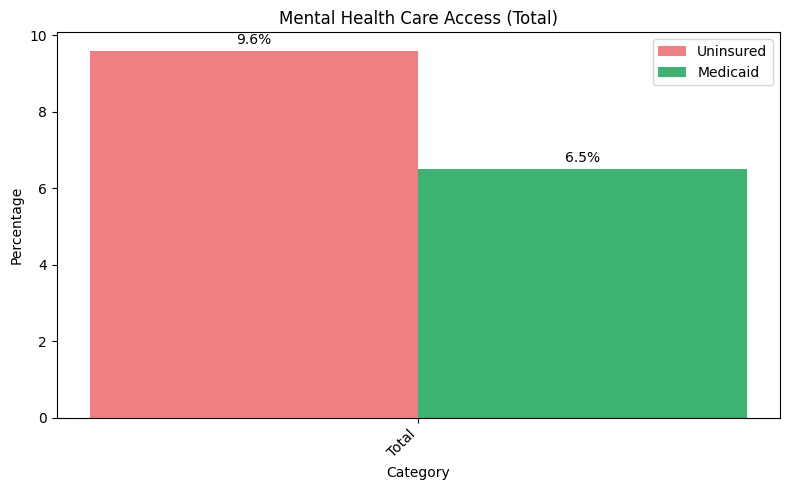

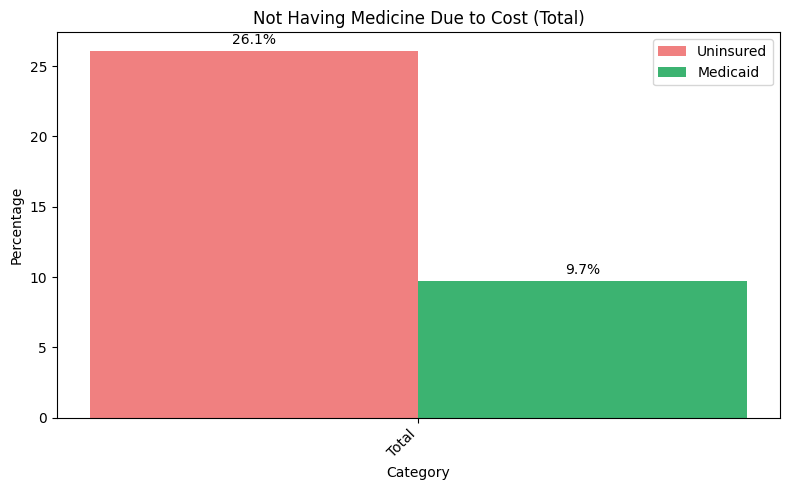

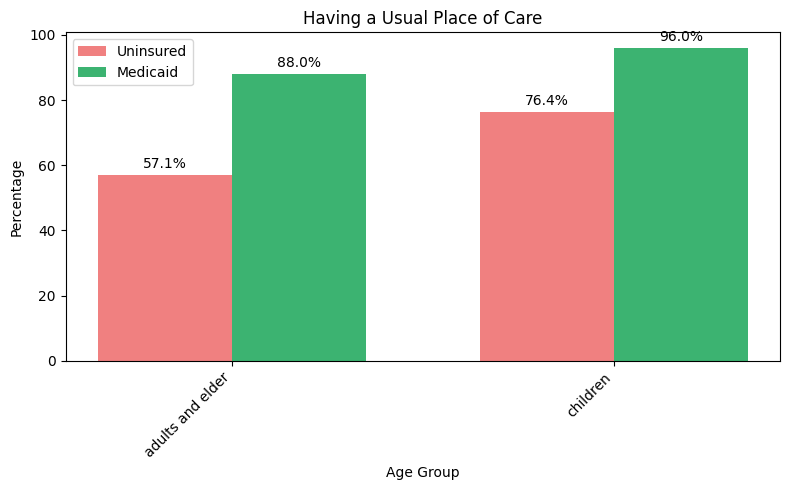

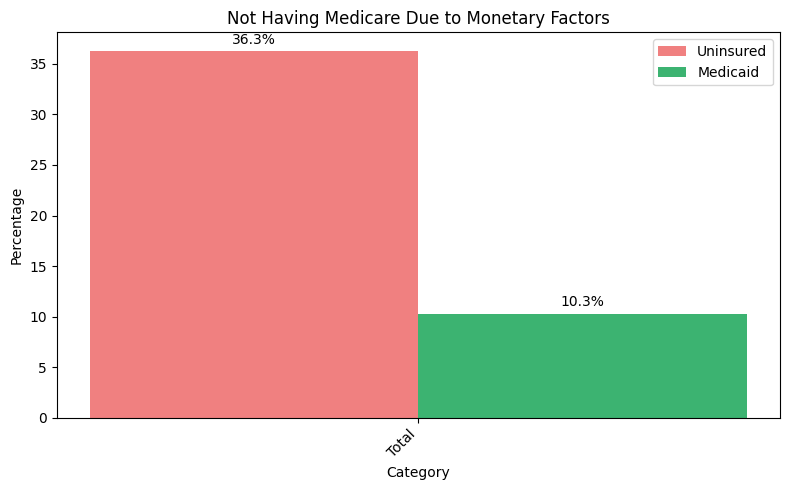

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot grouped bar charts for comparison
def plot_grouped_bar_chart(df, title, xlabel):
    fig, ax = plt.subplots(figsize=(8, 5))
    x = np.arange(len(df))  # the label locations
    width = 0.35  # the width of the bars

    bars1 = ax.bar(x - width/2, df["Uninsured Coverage (%)"], width, label="Uninsured", color='lightcoral')
    bars2 = ax.bar(x + width/2, df["Medicaid Coverage (%)"], width, label="Medicaid", color='mediumseagreen')

    # Formatting the chart
    ax.set_ylabel("Percentage")
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df.iloc[:, 0], rotation=45, ha="right")
    ax.legend()

    # Display values on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Plotting charts for each category
plot_grouped_bar_chart(delayed_medical_care, "Delayed Medical Care by Age Group", "Age Group")
plot_grouped_bar_chart(not_get_medical_care, "Not Getting Medical Care (Total)", "Category")
plot_grouped_bar_chart(mental_health_care, "Mental Health Care Access (Total)", "Category")
plot_grouped_bar_chart(not_have_medicine, "Not Having Medicine Due to Cost (Total)", "Category")
plot_grouped_bar_chart(usual_place_of_care, "Having a Usual Place of Care", "Age Group")
plot_grouped_bar_chart(not_have_medicare, "Not Having Medicare Due to Monetary Factors", "Category")


In [ ]:
# Creating DataFrame for Medicaid coverage among people younger than 65 years (2010-2019)
medicaid_coverage_df = pd.DataFrame({
    "Year": [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    "Northeast": [17.9, 19.6, 19.3, 20.8, 21.4, 21.6, 22.7, 21.2, 21.2, 23.2],
    "Midwest": [17.3, 16.7, 16.3, 16.9, 18.6, 19.8, 19.3, 18.3, 17.5, 17.4],
    "South": [16, 17.3, 17.8, 17.8, 18.7, 18.4, 19.3, 18.8, 18.9, 19.2],
    "West": [17.1, 18.4, 19.1, 18, 20.9, 24, 24, 23.2, 23.7, 23.3]
})

# Creating DataFrame for Uninsured for more than one year (2019-2023)
uninsured_df = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Northeast": [5.2, 4.8, 4.5, 4.1, 3.6],
    "Midwest": [7.1, 6.7, 5.8, 5.1, 5.2],
    "South": [13.7, 12.8, 12.6, 13.1, 10.7],
    "West": [7.5, 7.5, 7.8, 7.4, 5.7]
})


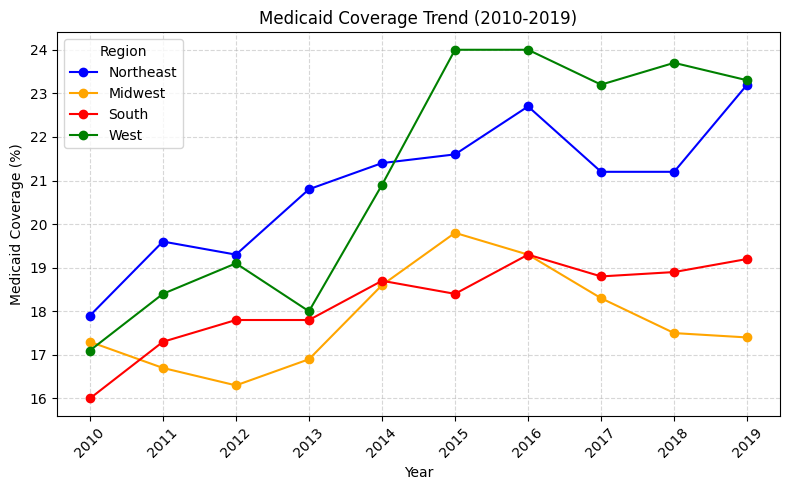

In [ ]:
# Define distinct colors for each region
colors = {
    "Northeast": "blue",
    "Midwest": "orange",
    "South": "red",
    "West": "green"
}

# Plotting Medicaid coverage trends over time with distinct colors
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each region's trend with distinct colors
for region in ["Northeast", "Midwest", "South", "West"]:
    ax.plot(medicaid_coverage_df["Year"], medicaid_coverage_df[region], marker='o', label=region, color=colors[region])

# Formatting the chart
ax.set_ylabel("Medicaid Coverage (%)")
ax.set_xlabel("Year")
ax.set_title("Medicaid Coverage Trend (2010-2019)")
ax.legend(title="Region")
ax.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.xticks(medicaid_coverage_df["Year"], rotation=45)
plt.tight_layout()
plt.show()


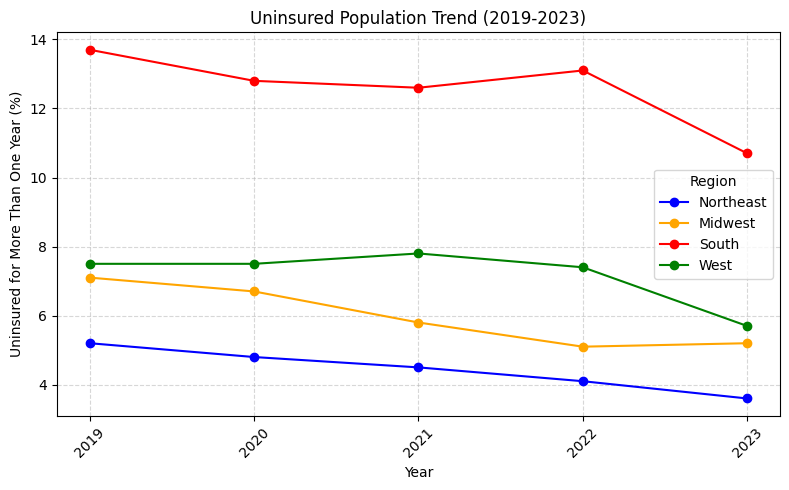

In [ ]:
# Plotting uninsured trends over time for different regions
fig, ax = plt.subplots(figsize=(8, 5))

# Define distinct colors for each region
colors_uninsured = {
    "Northeast": "blue",
    "Midwest": "orange",
    "South": "red",
    "West": "green"
}

# Plot each region's trend with distinct colors
for region in ["Northeast", "Midwest", "South", "West"]:
    ax.plot(uninsured_df["Year"], uninsured_df[region], marker='o', label=region, color=colors_uninsured[region])

# Formatting the chart
ax.set_ylabel("Uninsured for More Than One Year (%)")
ax.set_xlabel("Year")
ax.set_title("Uninsured Population Trend (2019-2023)")
ax.legend(title="Region")
ax.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.xticks(uninsured_df["Year"], rotation=45)
plt.tight_layout()
plt.show()


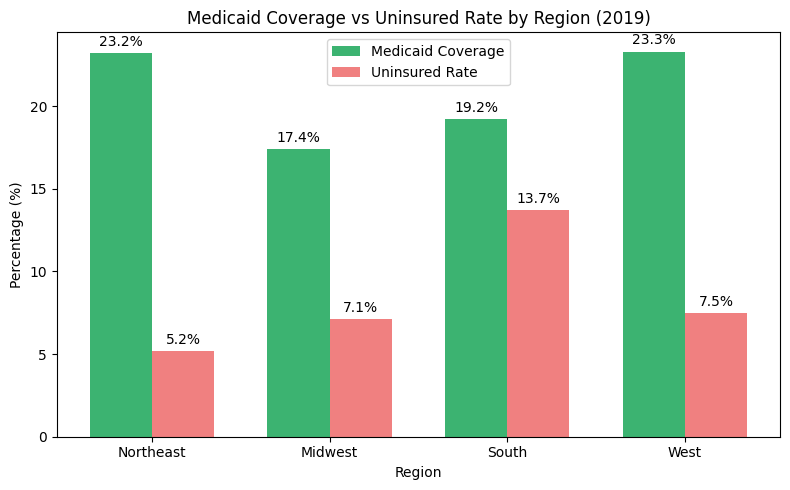

In [ ]:
# Extracting 2019 data for Medicaid and Uninsured
medicaid_2019 = medicaid_coverage_df[medicaid_coverage_df["Year"] == 2019].drop(columns=["Year"])
uninsured_2019 = uninsured_df[uninsured_df["Year"] == 2019].drop(columns=["Year"])

# Reshaping data for grouped bar chart
medicaid_2019 = medicaid_2019.melt(var_name="Region", value_name="Medicaid Coverage (%)")
uninsured_2019 = uninsured_2019.melt(var_name="Region", value_name="Uninsured Rate (%)")

# Merging both datasets
comparison_2019 = pd.merge(medicaid_2019, uninsured_2019, on="Region")

# Plotting a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(comparison_2019["Region"]))  # X-axis locations
width = 0.35  # Width of the bars

bars1 = ax.bar(x - width/2, comparison_2019["Medicaid Coverage (%)"], width, label="Medicaid Coverage", color="mediumseagreen")
bars2 = ax.bar(x + width/2, comparison_2019["Uninsured Rate (%)"], width, label="Uninsured Rate", color="lightcoral")

# Formatting
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Region")
ax.set_title("Medicaid Coverage vs Uninsured Rate by Region (2019)")
ax.set_xticks(x)
ax.set_xticklabels(comparison_2019["Region"])
ax.legend()

# Display values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Creating structured DataFrames for each dataset

# 1. Fair or poor health status in adults (65 years and older)
fair_poor_health_elder = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Private (%)": [20, 17.5, 18, 18.7, 17.3],
    "Medicare & Medicaid (%)": [53.7, 49.4, 44.6, 49.9, 48.8],
    "Medicare Advantage (%)": [22.5, 21.3, 20.3, 20.9, 23.3],
    "Medicare only (no Advantage) (%)": [24.6, 25.9, 27.1, 25.9, 26.1],
    "Other coverage (%)": [32.5, 30.6, 27.9, 26.4, 29.5],
    "Uninsured (%)": ["*", "*", "*", "*", "*"]
})

# 2. Fair or poor health status in adults (Younger than 65 years)
fair_poor_health_adults = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Private (%)": [7.6, 7, 7, 7.5, 8.3],
    "Medicaid or other public (%)": [28.2, 24.7, 23, 24.5, 25],
    "Other coverage (%)": [29.5, 29, 28.4, 28.5, 29],
    "Uninsured (%)": [15.3, 11.8, 12.4, 13.2, 12.5]
})

# 3. Fair or poor health status in children
fair_poor_health_children = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Private (%)": [1.3, 1.6, 1.2, 1.3, 1.2],
    "Medicaid or other public (%)": [4.9, 3, 3.5, 4.6, 3.6],
    "Other coverage (%)": ["*", 0.8, 2.3, "*", 1.3],
    "Uninsured (%)": [2.1, "*", 1.1, 2, 1.7]
})

# 4. Did not get needed medical care due to cost (65 years and older)
medical_cost_65 = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Private (%)": [1.7, 1.2, 1.2, 1.6, 1.3],
    "Medicare & Medicaid (%)": [2.9, 1.8, 2.4, 2.4, 3.5],
    "Medicare Advantage (%)": [3.5, 2.1, 2.7, 2.2, 2.4],
    "Medicare only (no Advantage) (%)": [6.2, 5.3, 3.5, 5.3, 3.3],
    "Other coverage (%)": [3, 2.3, 1.2, 2.3, 1.4],
    "Uninsured (%)": ["*", "*", "*", "*", "*"]
})

# 5. Did not get needed medical care due to cost (Younger than 65 years)
medical_cost_young = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Private (%)": [5.5, 4.7, 5.2, 4.8, 5.3],
    "Medicaid or other public (%)": [7.9, 7.2, 5.3, 7.1, 6.9],
    "Other coverage (%)": [10.1, 9.6, 6.6, 6.9, 9.4],
    "Uninsured (%)": [30.3, 23.4, 20.6, 22.1, 22.6]
})


In [ ]:
# Creating DataFrame for Fair or Poor Health Status in Adults by Region (2019-2023)
fair_poor_health_adults_region = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Northeast (%)": [14.9, 12.4, 11.6, 13.5, 14.2],
    "Midwest (%)": [13.6, 13.4, 12.7, 13.3, 14.1],
    "South (%)": [16.8, 15.8, 15.6, 16.3, 16.4],
    "West (%)": [14.5, 12.2, 12.6, 13.4, 14.7]
})

# Creating DataFrame for Fair or Poor Health Status in Children by Region (2019-2023)
fair_poor_health_children_region = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023],
    "Northeast (%)": [2.1, 1.6, 2.0, 2.9, 1.4],
    "Midwest (%)": [2.4, 2.8, 1.6, 2.1, 1.7],
    "South (%)": [3.1, 1.8, 2.3, 2.6, 2.7],
    "West (%)": [2.7, 2.7, 2.2, 2.8, 2.1]
})


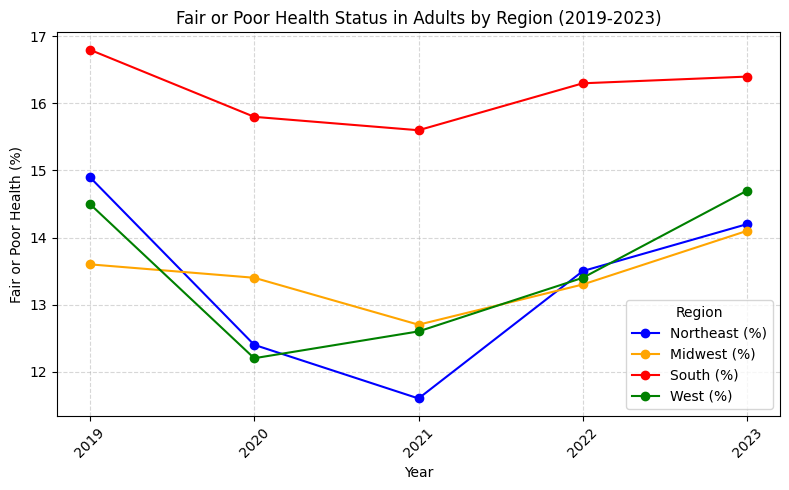

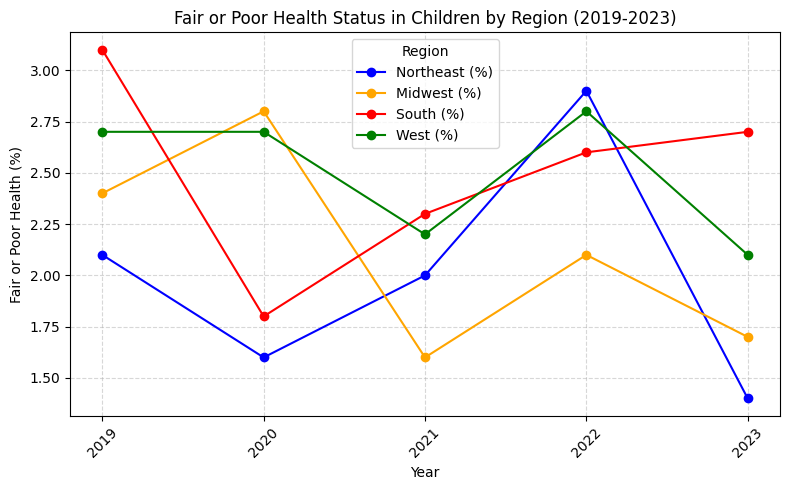

In [ ]:
# Plotting Fair or Poor Health Status in Adults by Region
fig, ax = plt.subplots(figsize=(8, 5))

# Define distinct colors for each region
colors_regions = {
    "Northeast (%)": "blue",
    "Midwest (%)": "orange",
    "South (%)": "red",
    "West (%)": "green"
}

# Plot each region's trend
for region, color in colors_regions.items():
    ax.plot(fair_poor_health_adults_region["Year"], fair_poor_health_adults_region[region], marker='o', label=region, color=color)

# Formatting
ax.set_ylabel("Fair or Poor Health (%)")
ax.set_xlabel("Year")
ax.set_title("Fair or Poor Health Status in Adults by Region (2019-2023)")
ax.legend(title="Region")
ax.grid(True, linestyle="--", alpha=0.5)

plt.xticks(fair_poor_health_adults_region["Year"], rotation=45)
plt.tight_layout()
plt.show()

# Plotting Fair or Poor Health Status in Children by Region
fig, ax = plt.subplots(figsize=(8, 5))

# Plot each region's trend
for region, color in colors_regions.items():
    ax.plot(fair_poor_health_children_region["Year"], fair_poor_health_children_region[region], marker='o', label=region, color=color)

# Formatting
ax.set_ylabel("Fair or Poor Health (%)")
ax.set_xlabel("Year")
ax.set_title("Fair or Poor Health Status in Children by Region (2019-2023)")
ax.legend(title="Region")
ax.grid(True, linestyle="--", alpha=0.5)

plt.xticks(fair_poor_health_children_region["Year"], rotation=45)
plt.tight_layout()
plt.show()


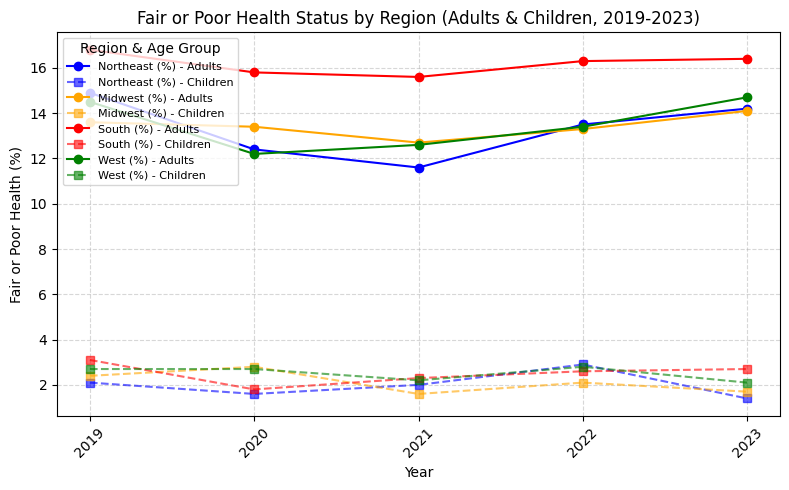

In [ ]:
# Merging Adult and Children Fair or Poor Health Status Data for a Unified View
fair_poor_health_combined = pd.concat([
    fair_poor_health_adults_region.melt(id_vars="Year", var_name="Region", value_name="Fair or Poor Health (%)").assign(Age_Group="Adults"),
    fair_poor_health_children_region.melt(id_vars="Year", var_name="Region", value_name="Fair or Poor Health (%)").assign(Age_Group="Children")
])

# Plotting Combined Fair or Poor Health Status by Region
fig, ax = plt.subplots(figsize=(8, 5))

# Define color mapping for regions
colors_regions = {
    "Northeast (%)": "blue",
    "Midwest (%)": "orange",
    "South (%)": "red",
    "West (%)": "green"
}

# Plot each region's trend for Adults and Children separately
for region, color in colors_regions.items():
    df_adults = fair_poor_health_combined[(fair_poor_health_combined["Region"] == region) & (fair_poor_health_combined["Age_Group"] == "Adults")]
    df_children = fair_poor_health_combined[(fair_poor_health_combined["Region"] == region) & (fair_poor_health_combined["Age_Group"] == "Children")]

    ax.plot(df_adults["Year"], df_adults["Fair or Poor Health (%)"], marker='o', linestyle="-", label=f"{region} - Adults", color=color)
    ax.plot(df_children["Year"], df_children["Fair or Poor Health (%)"], marker='s', linestyle="--", label=f"{region} - Children", color=color, alpha=0.6)

# Formatting
ax.set_ylabel("Fair or Poor Health (%)")
ax.set_xlabel("Year")
ax.set_title("Fair or Poor Health Status by Region (Adults & Children, 2019-2023)")
ax.legend(title="Region & Age Group", fontsize=8, loc="upper left")
ax.grid(True, linestyle="--", alpha=0.5)

plt.xticks(fair_poor_health_combined["Year"].unique(), rotation=45)
plt.tight_layout()
plt.show()


1.data story telling:
region vs. healthy outcome;
if consistent with coverage and outcome
2.steps:
analytics
insights
create story(time, region,whole country) with outcomes(groups;)
assumptions;
economics effect assessment saving
3.

In [ ]:
!pip install geopandas matplotlib descartes


In [ ]:
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces.zip
!unzip ne_110m_admin_1_states_provinces.zip
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the US states shapefile
us_states = gpd.read_file("ne_110m_admin_1_states_provinces.shp")

# Filter for United States only
us_states = us_states[us_states["admin"] == "United States of America"]

# Display the first few rows to verify
us_states.head()


--2025-01-30 19:14:08--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_1_states_provinces.zip
Resolving naciscdn.org (naciscdn.org)... 18.244.202.61, 18.244.202.16, 18.244.202.58, ...
Connecting to naciscdn.org (naciscdn.org)|18.244.202.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49304 (48K) [application/zip]
Saving to: ‘ne_110m_admin_1_states_provinces.zip’

ne_110m_admin_1_sta 100%[===================>]  48.15K  --.-KB/s    in 0.01s   

2025-01-30 19:14:09 (3.81 MB/s) - ‘ne_110m_admin_1_states_provinces.zip’ saved [49304/49304]

Archive:  ne_110m_admin_1_states_provinces.zip
  inflating: ne_110m_admin_1_states_provinces.README.html  
 extracting: ne_110m_admin_1_states_provinces.VERSION.txt  
 extracting: ne_110m_admin_1_states_provinces.cpg  
  inflating: ne_110m_admin_1_states_provinces.dbf  
  inflating: ne_110m_admin_1_states_provinces.prj  
  inflating: ne_110m_admin_1_states_provinces.sbn  
  inflating: ne_110m_admin_1_states_pro

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


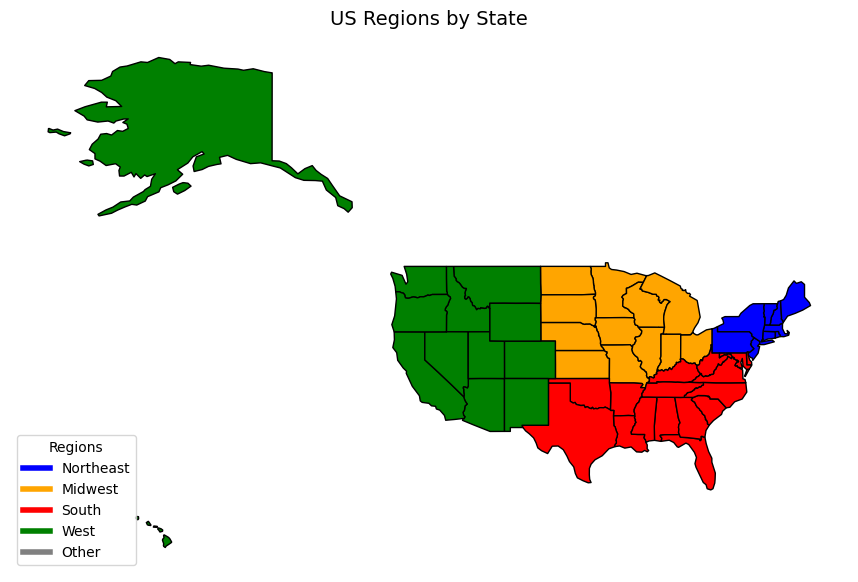

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile

# Load the US states shapefile
us_states = gpd.read_file("ne_110m_admin_1_states_provinces.shp")

# Filter for United States only
us_states = us_states[us_states["admin"] == "United States of America"]

# Define US regions and their corresponding states
regions = {
    "Northeast": ["Rhode Island", "Connecticut", "Maine", "Massachusetts", "New Hampshire",
                  "Vermont", "New York", "Pennsylvania", "New Jersey"],
    "Midwest": ["Illinois", "Michigan", "Minnesota", "Indiana", "Iowa", "Kansas",
                "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"],
    "South": ["Delaware", "Georgia", "Alabama", "Arkansas", "Florida", "Kentucky", "Louisiana",
              "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina",
              "Texas", "Virginia", "West Virginia", "Tennessee"],
    "West": ["Alaska", "California", "Colorado", "Hawaii", "Idaho", "Montana",
             "Arizona", "Nevada", "Utah", "Wyoming", "New Mexico", "Oregon", "Washington"]
}

# Assign each state to its region
us_states["Region"] = "Other"
for region, states in regions.items():
    us_states.loc[us_states["name"].isin(states), "Region"] = region

# Define colors for regions
region_colors = {
    "Northeast": "blue",
    "Midwest": "orange",
    "South": "red",
    "West": "green",
    "Other": "gray"  # Any state not categorized explicitly
}

# Plot the map
fig, ax = plt.subplots(figsize=(12, 7))
for region, color in region_colors.items():
    us_states[us_states["Region"] == region].plot(ax=ax, color=color, edgecolor="black", label=region)

# Formatting the map
ax.set_title("US Regions by State", fontsize=14)
ax.axis("off")

# Add legend with region colors
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=region) for region, color in region_colors.items()]
ax.legend(handles=legend_patches, title="Regions", loc="lower left")

# Show the plot
plt.show()
